In [2]:
#SciKit DSC540 HW1
'''created by Casey Bennett 2018, www.CaseyBennett.com'''

import sys
import csv
import math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from operator import itemgetter
import time
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.externals import joblib
from sklearn.feature_selection import RFE, VarianceThreshold, SelectFromModel
from sklearn.feature_selection import SelectKBest, mutual_info_regression, mutual_info_classif, chi2
from sklearn import metrics
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.preprocessing import KBinsDiscretizer, scale
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression

#Handle annoying warnings
import warnings, sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.ConvergenceWarning)

In [3]:
import os

In [7]:
os.getcwd()

'C:\\Users\\Cindy\\Documents\\DSC 540\\Project'

# Data load

In [8]:
df = pd.read_csv('hour.csv')

In [9]:
full_df = pd.read_csv('hour.csv', index_col=False)

In [10]:
full_df.rename(columns={'dteday':'datetime',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'count',
                        'hr':'hour',
                        'yr':'year'},inplace=True)

In [11]:
full_df.head(5)

,instant,datetime,season,year,month,hour,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [57]:
full_df.shape

(17379, 17)

In [58]:
full_df.rename(columns={'dteday':'datetime',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'count',
                        'hr':'hour',
                        'yr':'year'},inplace=True)

In [59]:
categoryVariableList = ["season","weather_condition","holiday","workingday"]
for var in categoryVariableList:
    df[var] = full_df[var].astype("category")

# Exploratory Analysis

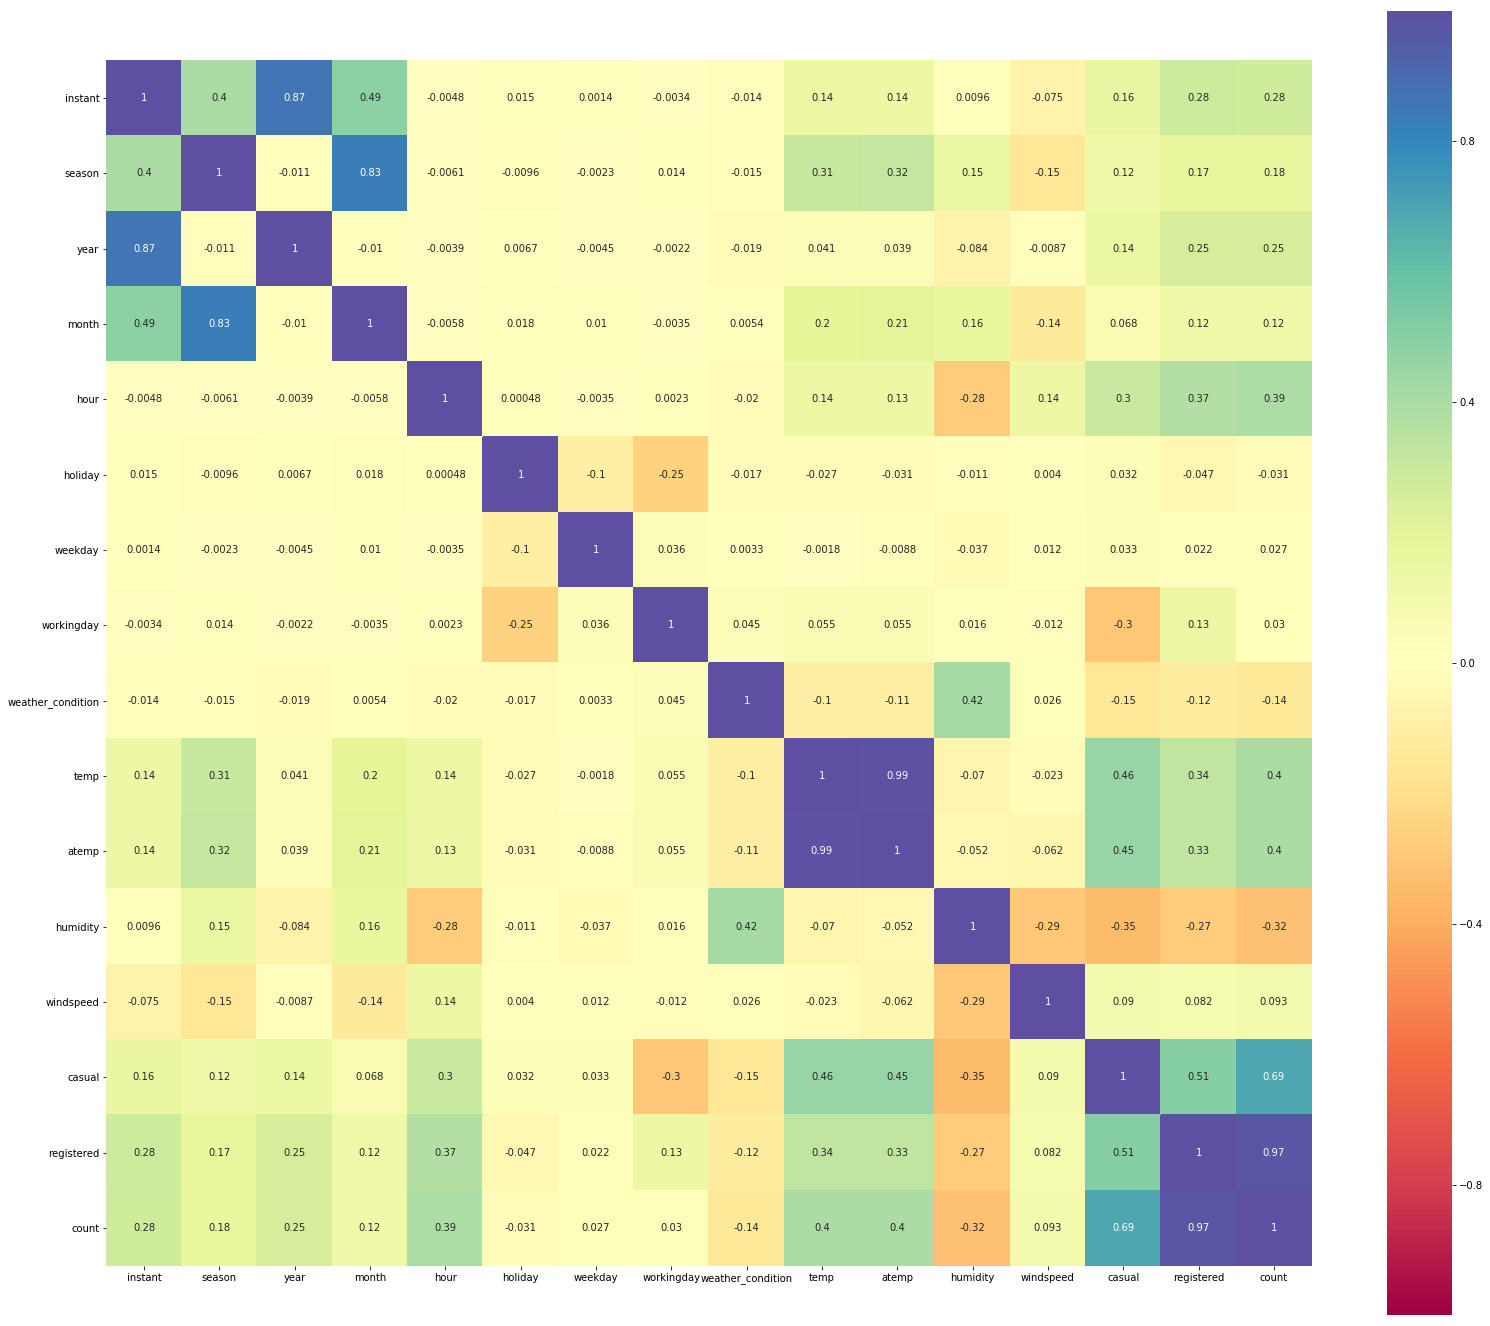

In [11]:
#correlation matrix visual
corrmat = full_df.corr()
plt.subplots(figsize=(27,24))
sns.heatmap(corrmat,  cmap="Spectral", vmax=1, vmin=-1, square=True, annot=True)

In [12]:
new_df=df.copy()
new_df.temp.describe()
new_df['temp_bin']=np.floor(new_df['temp'])//10
new_df['temp_bin'].unique()

array([-0.])

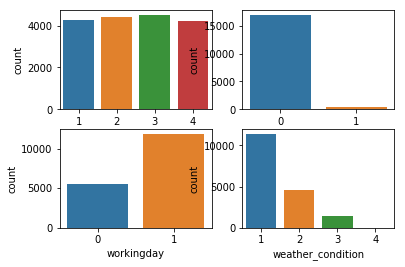

In [13]:
cat_names=['season', 'holiday', 'workingday', 'weather_condition']

i=0
for name in cat_names:
    i=i+1
    plt.subplot(2,2,i)
    sns.countplot(name,data=full_df) 
    
plt.show()

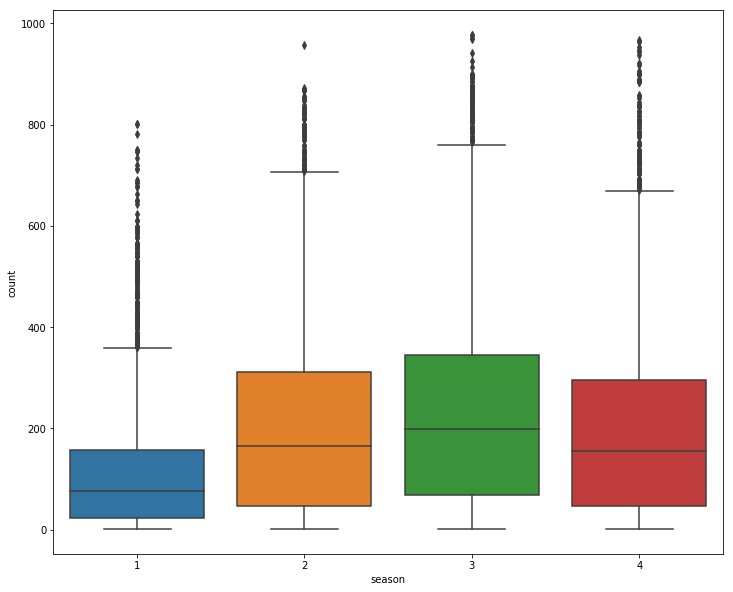

In [14]:
# Boxplot for season and count
fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(12, 10)
sns.boxplot(data=full_df,y="count",x="season")

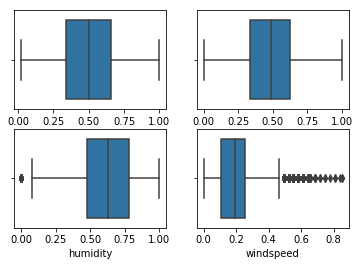

In [18]:
#nivariate analysis for continuous data

cont_names=['temp','atemp','humidity','windspeed']

        
#sns.boxplot(train_df['season'])   
i=0
for name in cont_names:
    i=i+1
    plt.subplot(2,2,i)
    sns.boxplot(name,data=full_df)
    
plt.show()

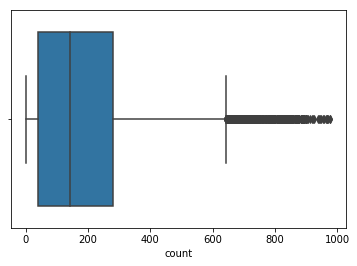

In [19]:
sns.boxplot(df['count'],data=full_df)
    
plt.show()

C:\Users\Cindy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0.5, 1.0, 'Year distribution of counts')]

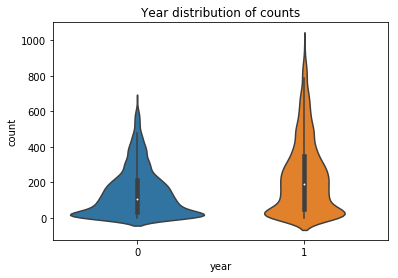

In [13]:
fig,ax = plt.subplots()
sns.violinplot(data=full_df[['year',
                           'count']],
              x='year',
              y='count',
              ax=ax)
ax.set(title="Year distribution of counts")

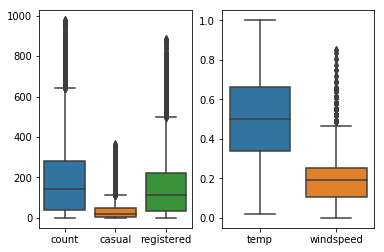

In [14]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
sns.boxplot(data=full_df[['count',
                          'casual',
                          'registered']],ax=ax1)
sns.boxplot(data=full_df[['temp',
                          'windspeed']],ax=ax2)

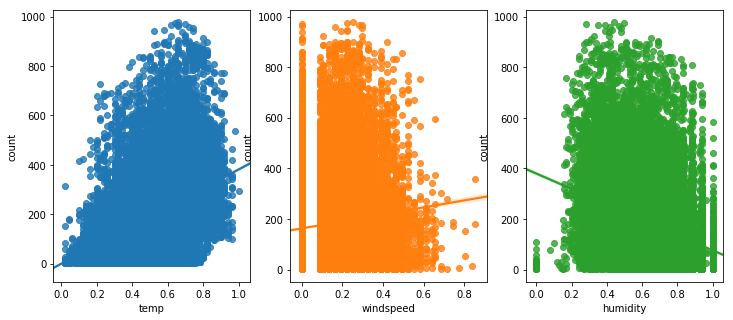

In [18]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sns.regplot(x="temp", y="count", data=full_df,ax=ax1)
sns.regplot(x="windspeed", y="count", data=full_df,ax=ax2)
sns.regplot(x="humidity", y="count", data=full_df,ax=ax3)

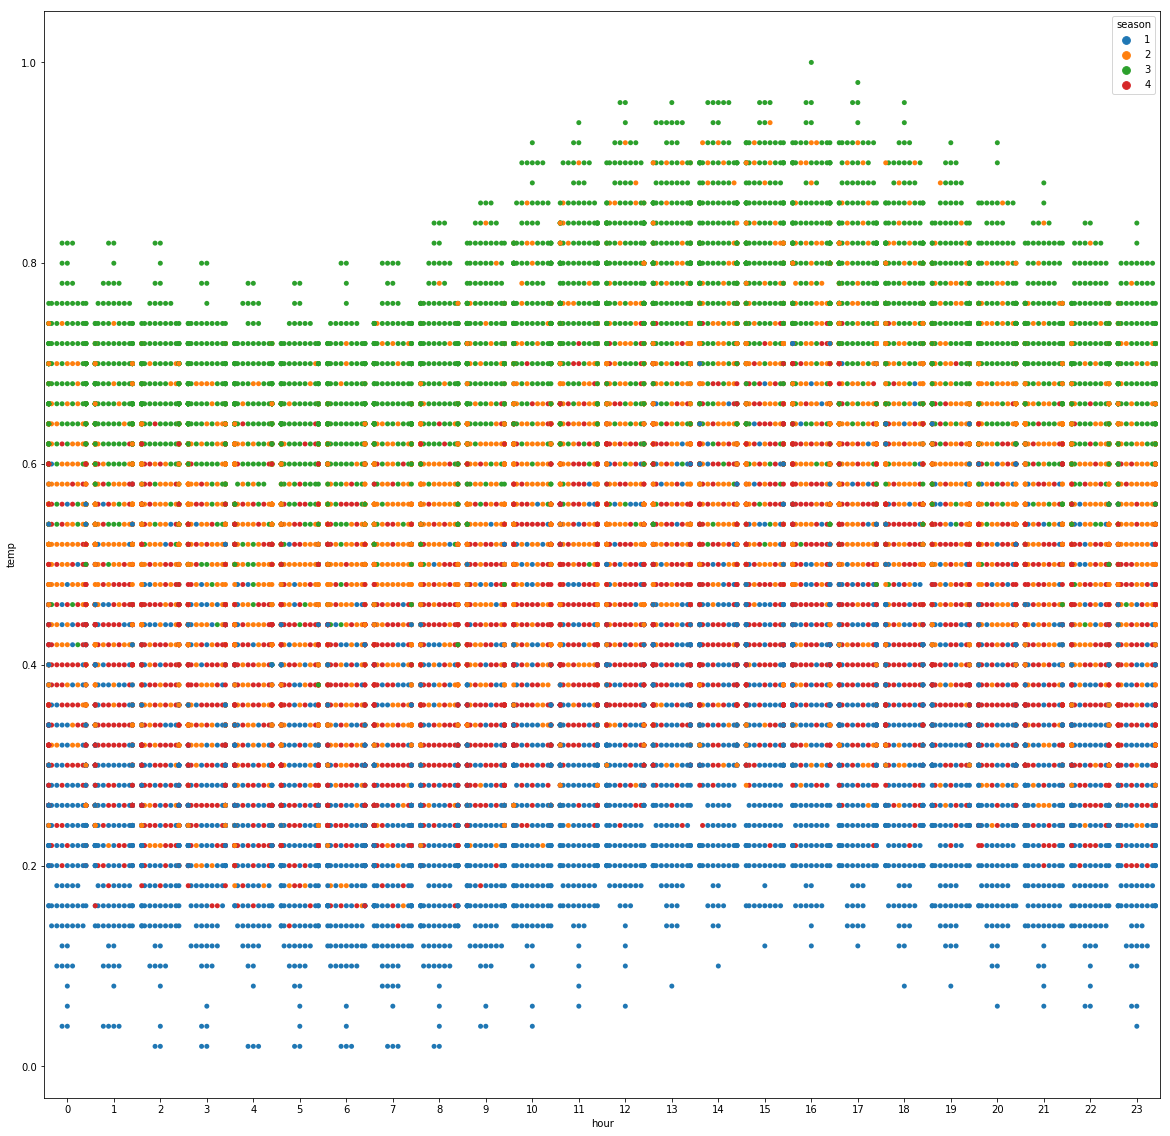

In [447]:
plt.figure(figsize=(20,20))
sns.swarmplot(x='hour',y='temp',data=full_df,hue='season')
plt.show()

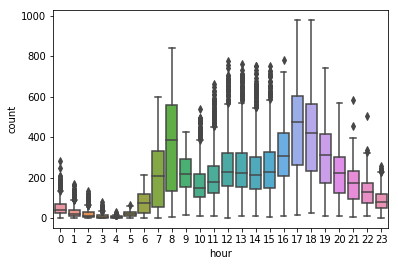

In [23]:
sns.boxplot(data=df,y="count",x="hour")

C:\Users\Cindy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


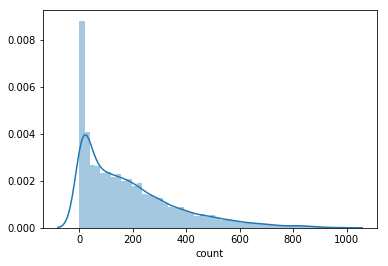

In [21]:
sns.distplot(full_df["count"])

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Median Count By Hour Of The Day Across User Type'),
 None]

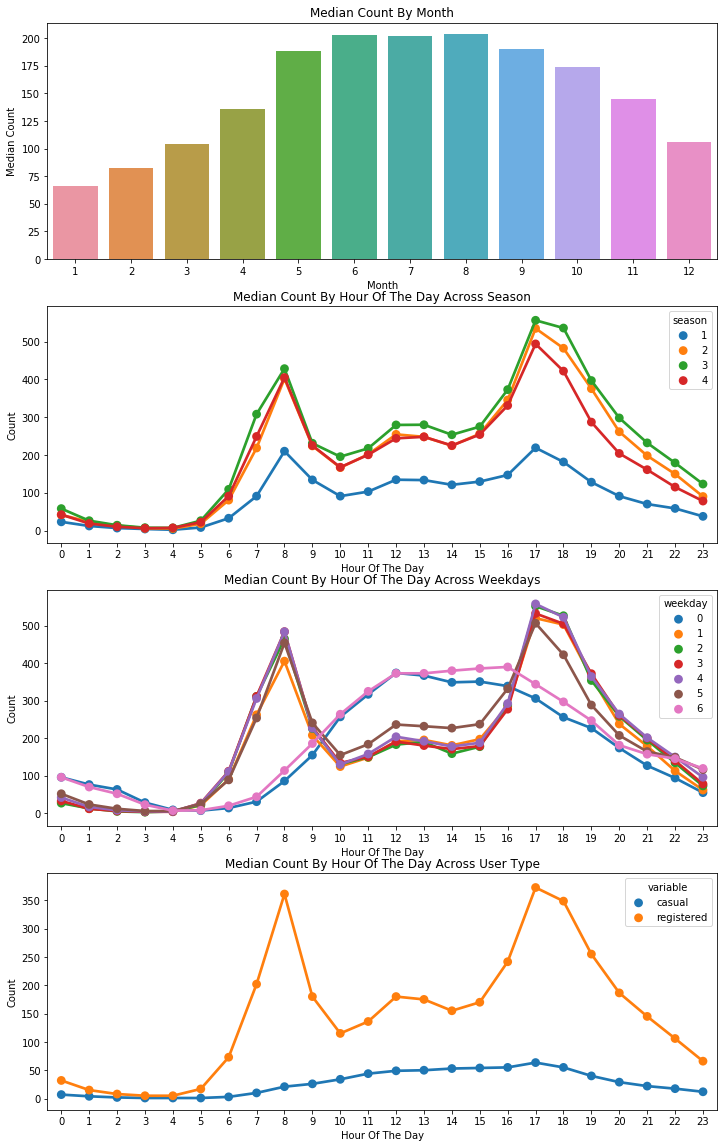

In [28]:
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

fig,(ax1,ax2,ax3,ax4)= plt.subplots(nrows=4)
fig.set_size_inches(12,20)
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

monthAggregated = pd.DataFrame(df.groupby("month")["count"].median()).reset_index()
monthSorted = monthAggregated.sort_values(by="count",ascending=False)
sns.barplot(data=monthSorted,x="month",y="count",ax=ax1)
ax1.set(xlabel='Month', ylabel='Median Count',title="Median Count By Month")
monthSorted

hourAggregated = pd.DataFrame(df.groupby(["hour","season"],sort=True)["count"].median()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["season"], data=hourAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Count',title="Median Count By Hour Of The Day Across Season",label='big')

hourAggregated = pd.DataFrame(df.groupby(["hour","weekday"],sort=True)["count"].median()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["weekday"], data=hourAggregated, join=True,ax=ax3)
ax3.set(xlabel='Hour Of The Day', ylabel='Count',title="Median Count By Hour Of The Day Across Weekdays",label='big')


hourTransformed = pd.melt(df[["hour","casual","registered"]], id_vars=['hour'], value_vars=['casual', 'registered'])
hourAggregated = pd.DataFrame(hourTransformed.groupby(["hour","variable"],sort=True)["value"].median()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["value"],hue=hourAggregated["variable"],hue_order=["casual","registered"], data=hourAggregated, join=True,ax=ax4)
ax4.set(xlabel='Hour Of The Day', ylabel='Count',title="Median Count By Hour Of The Day Across User Type",label='big')

In [642]:
#Wind0 = df[df["windspeed"]==0]
#WindNot0 = df[df["windspeed"]!=0]
#rfModel_wind = RandomForestRegressor()
#windColumns = ["season","weather_condition","humidity","month","temp","year","atemp"]
#rfModel_wind.fit(WindNot0[windColumns], WindNot0["windspeed"])

#wind0Values = rfModel_wind.predict(X= Wind0[windColumns])
#Wind0["windspeed"] = wind0Values
#df = WindNot0.append(Wind0)
#df.reset_index(inplace=True)
#df.drop('index',inplace=True,axis=1)

C:\Users\Cindy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [35]:
full_df.head(5)

,instant,datetime,season,year,month,hour,holiday,weekday,workingday,weather_condition,humidity,windspeed,casual,registered,count,Ftemp
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.81,0.0,3,13,16,37.904
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.80,0.0,8,32,40,36.212
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.80,0.0,5,27,32,36.212
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.75,0.0,3,10,13,37.904
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.75,0.0,0,1,1,37.904


In [29]:
full_df.dtypes

instant                int64
datetime              object
season                 int64
year                   int64
month                  int64
hour                   int64
holiday                int64
weekday                int64
workingday             int64
weather_condition      int64
temp                 float64
atemp                float64
humidity             float64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [37]:
full_df.describe()

,instant,season,year,month,hour,holiday,weekday,workingday,weather_condition,humidity,windspeed,casual,registered,count,Ftemp
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.627229,0.190098,35.676218,153.786869,189.463088,59.645114
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192930,0.122340,49.305030,151.357286,181.387599,16.290248
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.292000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.480000,0.104500,4.000000,34.000000,40.000000,46.364000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.630000,0.194000,17.000000,115.000000,142.000000,59.900000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.780000,0.253700,48.000000,220.000000,281.000000,73.436000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,0.850700,367.000000,886.000000,977.000000,102.200000


In [41]:
# Dummy variable
#dummy_weather = pd.get_dummies(df["weather_condition"],prefix="weather")
#dummy_weather.head(5)
#dummy_holiday = pd.get_dummies(df["holiday"],prefix="holiday")
#dummy_holiday.head(5)
#dummy_weekday = pd.get_dummies(df["weekday"],prefix="weekday")
#dummy_weekday.head(5)
dummy_workingday = pd.get_dummies(df["workingday"],prefix="workingday")
dummy_workingday.head(5)
#dummy_season = pd.get_dummies(df["season"],prefix="season")
#dummy_season.head(5)


,workingday_0,workingday_1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [1191]:
#data.drop(['holiday','season','workingday','weather_condition'],axis=1, inplace=True)
#data=pd.concat([data, dummy_weather,dummy_holiday, dummy_workingday, dummy_season],axis=1)
df_dum=pd.concat([df_working, dummy_weather],axis=1)
print(df_dum.columns)

Index(['temp', 'month', 'hour', 'humidity', 'windspeed', 'workingday_0',
       'workingday_1', 'year', 'weather_1', 'weather_2', 'weather_3',
       'weather_4'],
      dtype='object')


#     

## Feature cleaning and preprocessing

In [60]:
full_df['workingday']=pd.factorize(full_df['workingday'])[0]
full_df['holiday']=pd.factorize(full_df['holiday'])[0]

In [61]:
Ftemp = ((full_df['temp']*(39+8)-8)*9/5)+32
full_df.drop(['temp', 'atemp' ],axis=1, inplace=True)
full_df['Ftemp']=Ftemp
Ftemp.head(5)

0    37.904
1    36.212
2    36.212
3    37.904
4    37.904
Name: temp, dtype: float64

In [62]:
weather_dict = full_df['weather_condition'].value_counts().to_dict()
print(weather_dict.keys())
weather_sum = full_df['weather_condition'].sum()
print(full_df['weather_condition'].sum())

dict_keys([1, 2, 3, 4])
24770


In [63]:
for i in weather_dict.values():
    print(i/weather_sum)

0.4607589826402907
0.18344771901493742
0.05728704077513121
0.00012111425111021397


In [64]:
def variable_func(full_df):
    """ Function for generating new value"""
    if full_df['weather_condition'] ==1:
        return 0.4607589826402907
    elif full_df['weather_condition'] ==2:
        return 0.18344771901493742
    elif full_df['weather_condition'] ==3:
        return 0.05728704077513121
    else:
        return 0.00012111425111021397

In [65]:
new_weather = full_df.apply(variable_func, axis=1)
new_weather.name = 'new_weather'
full_df['new_weather']=new_weather
full_df.head(5)

,instant,datetime,season,year,month,hour,holiday,weekday,workingday,weather_condition,humidity,windspeed,casual,registered,count,Ftemp,new_weather
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.81,0.0,3,13,16,37.904,0.460759
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.80,0.0,8,32,40,36.212,0.460759
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.80,0.0,5,27,32,36.212,0.460759
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.75,0.0,3,10,13,37.904,0.460759
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.75,0.0,0,1,1,37.904,0.460759


In [66]:
modified_df = full_df.drop(['datetime', 'instant','season', 'weather_condition','casual', 'registered'],axis=1)
modified_df.head(5)

,year,month,hour,holiday,weekday,workingday,humidity,windspeed,count,Ftemp,new_weather
0,0,1,0,0,6,0,0.81,0.0,16,37.904,0.460759
1,0,1,1,0,6,0,0.80,0.0,40,36.212,0.460759
2,0,1,2,0,6,0,0.80,0.0,32,36.212,0.460759
3,0,1,3,0,6,0,0.75,0.0,13,37.904,0.460759
4,0,1,4,0,6,0,0.75,0.0,1,37.904,0.460759


In [69]:
modified_df = modified_df[['count', 'year','month', 'hour', 'holiday', 'weekday', 'workingday', 'humidity','windspeed','Ftemp','new_weather']]
modified_df.head(5)

,count,year,month,hour,holiday,weekday,workingday,humidity,windspeed,Ftemp,new_weather
0,16,0,1,0,0,6,0,0.81,0.0,37.904,0.460759
1,40,0,1,1,0,6,0,0.80,0.0,36.212,0.460759
2,32,0,1,2,0,6,0,0.80,0.0,36.212,0.460759
3,13,0,1,3,0,6,0,0.75,0.0,37.904,0.460759
4,1,0,1,4,0,6,0,0.75,0.0,37.904,0.460759


In [70]:
#print(modified_df.columns)
#data=modified_df2.iloc[:,:9]
#target=modified_df.iloc[:,0]
#target = full_df.loc[:,'count']
#print(data.head(5))
#print(target.head(5))

In [71]:
#modified_df=pd.concat([modified_df, dummy_workingday],axis=1)
#modified_df.drop(['holiday'], axis=1, inplace=True)
#modified_df['workingday'] = full_df['workingday']
#modified_df.head(10)

In [72]:
modified_df.to_csv("modified_df.csv",  float_format="%1.2f", index = False)

In [73]:
np.set_printoptions(precision=2, linewidth=120, suppress=True, edgeitems=7)


#############################################################################
#
# Global parameters
#
#####################

target_idx=0                                        #Index of Target variable
cross_val=1                                          #Control Switch for CV                                                                                                                                                                                           
norm_target=0                                       #Normalize target switch
norm_features=0                                     #Normalize target switch                                                                                                    
binning=0                                           #Control Switch for Bin Target
bin_cnt=0                                           #If bin target, this sets number of classes
feat_select=1                                       #Control Switch for Feature Selection                                                                                        
fs_type=1                                           #Feature Selection type (1=Stepwise Backwards Removal, 2=Wrapper Select, 3=Univariate Selection)
lv_filter=0                                         #Control switch for low variance filter on features
feat_start=1                                        #Start column of features
k_cnt=7                                            #Number of 'Top k' best ranked features to select, only applies for fs_types 1 and 3

#Set global model parameters
rand_st=1                                           #Set Random State variable for randomizing splits on runs


#############################################################################
#
# Load Data
#
#####################

file1= csv.reader(open('modified_df.csv'), delimiter=',', quotechar='"')

#Read Header Line
header=next(file1)            

#Read data
data=[]
target=[]
for row in file1:
    #Load Target
    if row[target_idx]=='':                         #If target is blank, skip row                       
        continue
    else:
        target.append(float(row[target_idx]))       #If pre-binned class, change float to int

    #Load row into temp array, cast columns  
    temp=[]
                 
    for j in range(feat_start,len(header)):
        if row[j]=='':
            temp.append(float())
        else:
            temp.append(float(row[j]))

    #Load temp into Data array
    data.append(temp)
  
#Test Print
print(header)
print(len(target),len(data))
print('\n')

data_np=np.asarray(data)
target_np=np.asarray(target)

#Test/Train split
data_train, data_test, target_train, target_test = train_test_split(data_np, target_np, test_size=0.20, random_state=1)


#############################################################################
#
# Wrapper Feat Select Helper
#
##########################################

#Recursive Function for searching thru feature space
def feat_space_search(arr, curr_idx):
    '''Setup currently as exhuastive search, but could be changed to use
       greedy search, random search, genetic algorithms, etc. ... also
       no regularization, so probably selects more features than necessary'''
    global roll_idx, combo_ctr, best_score, sel_idx
    
    if curr_idx==feat_cnt:
        #If end of feature array, roll thru combinations
        roll_idx=roll_idx+1
        print ("Combos Searched so far:", combo_ctr, "Current Best Score:", best_score)
        for i in range(roll_idx, len(arr)):
            arr[i]=0
        if roll_idx<feat_cnt-1:
            feat_space_search(arr, roll_idx+1)                                                                      #Recurse till end of rolls
        
    else:
        #Else setup next feature combination and calc performance
        arr[curr_idx]=1
        data=data_np#_wrap                                                                                          #Temp array to hold data
        temp_del=[i for i in range(len(arr)) if arr[i]==0]                                                          #Pick out features not in this combo, and remove
        data = np.delete(data, temp_del, axis=1)
        data_train, data_test, target_train, target_test = train_test_split(data, target_np, test_size=0.35)                

        if binning==1:
            if bin_cnt<=2:
                scorers = {'Accuracy': 'accuracy', 'roc_auc': 'roc_auc'}
                scores = cross_validate(clf, data_np, target_np, scoring=scorers, cv=5) 
                score = scores['test_roc_auc'].mean()                                                               #AUC
            else:
                sscorers = {'Accuracy': 'accuracy'}
                scores = cross_validate(clf, data_np, target_np, scoring=scorers, cv=5) 
                score = scores['test_Accuracy'].mean()                                                              #Accuracy
            print('Random Forest Acc/AUC:', curr_idx, feat_arr, len(data[0]), score)
            if score>best_score:                                                                                    #Compare performance and update sel_idx and best_score, if needed
                best_score=score
                sel_idx=copy.deepcopy(arr) 
                
        if binning==0:
            scorers = {'Neg_MSE': 'neg_mean_squared_error', 'expl_var': 'explained_variance'}
            scores = cross_validate(rgr, data, target_np, scoring=scorers, cv=5)    
            score = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']]).mean()                              #RMSE
            print('Random Forest RMSE:', curr_idx, feat_arr, len(data[0]), score)
            if score<best_score:                                                                                    #Compare performance and update sel_idx and best_score, if needed
                best_score=score
                sel_idx=copy.deepcopy(arr) 

        #move to next feature index and recurse
        combo_ctr+=1  
        curr_idx+=1
        feat_space_search(arr, curr_idx)  




#############################################################################
#
# Preprocess data
#
##########################################

if norm_target==1:
    #Target normalization for continuous values
    target_np=scale(target_np)

if norm_features==1:
    #Feature normalization for continuous values
    data_np=scale(data_np)

if binning==1:
    #Discretize Target variable with KBinsDiscretizer
    enc = KBinsDiscretizer(n_bins=[bin_cnt], encode='ordinal', strategy='quantile')                         #Strategy here is important, quantile creating equal bins, but kmeans prob being more valid "clusters"
    target_np_bin = enc.fit_transform(target_np.reshape(-1,1))

    #Get Bin min/max
    temp=[[] for x in range(bin_cnt+1)]
    for i in range(len(target_np)):
        for j in range(bin_cnt):
            if target_np_bin[i]==j:
                temp[j].append(target_np[i])

    for j in range(bin_cnt):
        print('Bin', j, ':', min(temp[j]), max(temp[j]), len(temp[j]))
    print('\n')

    #Convert Target array back to correct shape
    target_np=np.ravel(target_np_bin)
    



#############################################################################
#
# Feature Selection
#
##########################################

#Low Variance Filter
if lv_filter==1:
    print('--LOW VARIANCE FILTER ON--', '\n')
    
    #LV Threshold
    sel = VarianceThreshold(threshold=0.5)                                          #Removes any feature with less than 20% variance
    fit_mod=sel.fit(data_train)
    fitted=sel.transform(data_train)
    sel_idx=fit_mod.get_support()

    #Get lists of selected and non-selected features (names and indexes)
    temp=[]
    temp_idx=[]
    temp_del=[]
    for i in range(len(data_train[0])):
        if sel_idx[i]==1:                                                           #Selected Features get added to temp header
            temp.append(header[i+feat_start])
            temp_idx.append(i)
        else:                                                                       #Indexes of non-selected features get added to delete array
            temp_del.append(i)

    print('Selected:', temp)
    print('Features (total, selected):', len(data_train[0]), len(temp))
    print('\n')

    #Filter selected columns from original dataset
    header = header[0:feat_start]
    for field in temp:
        header.append(field)
    data_train = np.delete(data_train, temp_del, axis=1)                                 #Deletes non-selected features by index


#Feature Selection
if feat_select==1:
    '''Three steps:
       1) Run Feature Selection
       2) Get lists of selected and non-selected features
       3) Filter columns from original dataset
       '''
    
    print('--FEATURE SELECTION ON--', '\n')
    
    ##1) Run Feature Selection #######
    if fs_type==1:
        #Stepwise Recursive Backwards Feature removal
        if binning==1:
            clf = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=3, criterion='entropy', random_state=rand_st)
            sel = RFE(clf, n_features_to_select=k_cnt, step=.1)
            print('Stepwise Recursive Backwards - Random Forest: ')
        if binning==0:
            rgr = RandomForestRegressor(n_estimators=500, max_depth=None, min_samples_split=3, criterion='mse', random_state=rand_st)
            sel = RFE(rgr, n_features_to_select=k_cnt, step=.1)
            print('Stepwise Recursive Backwards - Random Forest: ')
            
        fit_mod=sel.fit(data_train, target_train)
        print(sel.ranking_)
        sel_idx=fit_mod.get_support()      

    if fs_type==2:
        #Wrapper Select via model
        if binning==1:
            clf = '''Unused in this homework'''
            sel = SelectFromModel(clf, prefit=False, threshold='mean', max_features=None)                                                           #to select only based on max_features, set to integer value and set threshold=-np.inf
            print ('Wrapper Select: ')
        if binning==0:
            rgr=RandomForestRegressor(n_estimators=100, criterion='mse', max_features=.33, max_depth=None, 
                                min_samples_split=3, random_state= rand_st) 
            #rgr = GradientBoostingRegressor( random_state=rand_st)
            sel = SelectFromModel(rgr, prefit=False, threshold='mean', max_features=None)
            print ('Wrapper Select: ')
            
        fit_mod=sel.fit(data_train, target_train)    
        sel_idx=fit_mod.get_support()

    if fs_type==3:
        if binning==1:                                                              ######Only work if the Target is binned###########
            #Univariate Feature Selection - Chi-squared
            sel=SelectKBest(chi2, k=k_cnt)
            fit_mod=sel.fit(data_train, target_train)                                         #will throw error if any negative values in features, so turn off feature normalization, or switch to mutual_info_classif
            print ('Univariate Feature Selection - Chi2: ')
            sel_idx=fit_mod.get_support()

        if binning==0:                                                              ######Only work if the Target is continuous###########
            #Univariate Feature Selection - Mutual Info Regression
            sel=SelectKBest(mutual_info_regression, k=k_cnt)
            fit_mod=sel.fit(data_train, target_train)
            print(sel.pvalues_)
            print ('Univariate Feature Selection - Mutual Info: ')
            sel_idx=fit_mod.get_support()

        #Print ranked variables out sorted
        temp=[]
        scores=fit_mod.scores_
        for i in range(feat_start, len(header)):            
            temp.append([header[i], float(scores[i-feat_start])])

        print('Ranked Features')
        temp_sort=sorted(temp, key=itemgetter(1), reverse=True)
        for i in range(len(temp_sort)):
            print(i, temp_sort[i][0], ':', temp_sort[i][1])
        print('\n')
        
        
    if fs_type==4:
        #Full-blown Wrapper Select (from any kind of ML model)        
        if binning==1:                                                              ######Only work if the Target is binned###########
            start_ts=time.time()
            sel_idx=[]                                                                                      #Empty array to hold optimal selected feature set
            best_score=0                                                                                    #For classification compare Accuracy or AUC, higher is better, so start with 0
            feat_cnt=len(data_train[0])
            #Create Wrapper model
            clf = '''Unused in this homework'''                                 #This could be any kind of classifier model
      
        if binning==0:                                                              ######Only work if the Target is continuous###########
            start_ts=time.time()
            sel_idx=[]                                                                                      #Empty array to hold optimal selected feature set
            best_score=sys.float_info.max                                                                   #For regression compare RMSE, lower is better, so start with max sys float value
            feat_cnt=len(data_train[0])
            #Create Wrapper model
            rgr = RandomForestRegressor(n_estimators=100, criterion='mse', max_features=.33, max_depth=None, min_samples_split=3, random_state= rand_st)                   #This could be any kind of regressor model         
        
        #Loop thru feature sets
        roll_idx=0
        combo_ctr=0
        feat_arr=[0 for col in range(feat_cnt)]                                         #Initialize feature array
        for idx in range(feat_cnt):
            roll_idx=idx
            feat_space_search(feat_arr, idx)                                           #Recurse
            feat_arr=[0 for col in range(feat_cnt)]                                     #Reset feature array after each iteration
        
        print('# of Feature Combos Tested:', combo_ctr)
        print(best_score, sel_idx, len(data_np[0]))
        print("Wrapper Feat Sel Runtime:", time.time()-start_ts)

    ##2) Get lists of selected and non-selected features (names and indexes) #######
    temp=[]
    temp_idx=[]
    temp_del=[]
    for i in range(len(data_train[0])):
        if sel_idx[i]==1:                                                           #Selected Features get added to temp header
            temp.append(header[i+feat_start])
            temp_idx.append(i)
        else:                                                                       #Indexes of non-selected features get added to delete array
            temp_del.append(i)
    print('Selected', temp)
    print('Features (total/selected):', len(data_train[0]), len(temp))
    print('\n')
            
                
    ##3) Filter selected columns from original dataset #########
    header = header[0:feat_start]
    for field in temp:
        header.append(field)
    data_train = np.delete(data_train, temp_del, axis=1)                                 #Deletes non-selected features by index)
    

    

#############################################################################
#
# Train SciKit Models
#
##########################################
print(header)
print(len(target),len(data))
print('\n')

print('--ML Model Output--', '\n')
    

####Regressors####
if binning==0 and cross_val==0:
    
    #SciKit Decision Tree Regressor
    rgr = DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, min_samples_split=3, min_samples_leaf=1, max_features=None, random_state=rand_st)
    rgr.fit(data_train, target_train)

    scores_RMSE = math.sqrt(metrics.mean_squared_error(target_test, rgr.predict(data_test)))
    print('Decision Tree RMSE:', scores_RMSE)
    scores_Expl_Var = metrics.explained_variance_score(target_test, rgr.predict(data_test))
    print('Decision Tree Expl Var:', scores_Expl_Var)
    
    #SciKit Random Forest Regressor - Cross Val
    start_ts=time.time()
    rgr = RandomForestRegressor(n_estimators=100, criterion='mse', max_features=.33, max_depth=None, 
                                min_samples_split=3, random_state= rand_st)  
    rgr.fit(data_train, target_train)
    #test_pred=rgr.predict(data_test)
    #rmsle.append(np.sqrt(mean_squared_log_error(test_pred,target_test)))

    scores_RMSE = math.sqrt(metrics.mean_squared_error(target_test, rgr.predict(data_test)))
    print('Random Forest RMSE:', scores_RMSE)
    scores_Expl_Var = metrics.explained_variance_score(target_test, rgr.predict(data_test))
    print('Random Forest Expl Var:', scores_Expl_Var)

    #SciKit Gradient Boosting Regressor - Cross Val
    start_ts=time.time()
    rgr = GradientBoostingRegressor(loss='ls',learning_rate=0.1, n_estimators=100, max_depth=3, min_samples_split=3, random_state=rand_st)
    rgr.fit(data_train, target_train)
    rgr.feature_importances_
    #rmsle.append(np.sqrt(mean_squared_log_error(test_pred,target_test)))

    scores_RMSE = math.sqrt(metrics.mean_squared_error(target_test, rgr.predict(data_test)))
    print('Gradient Boosting RMSE:', scores_RMSE)
    scores_Expl_Var = metrics.explained_variance_score(target_test, rgr.predict(data_test))
    print('Gradient Boosting Expl Var:', scores_Expl_Var)
    
    
####Cross-Val Regressors####
if binning==0 and cross_val==1:
    print('cross-validation output:')
    #Setup Crossval regression scorers
    scorers = {'Neg_MSE': 'neg_mean_squared_error', 'expl_var': 'explained_variance'} 
    
    #SciKit Decision Tree Regressor - Cross Val
    start_ts=time.time()
    rgr = DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, min_samples_split=3, min_samples_leaf=1, max_features=None, random_state=rand_st)
    scores = cross_validate(rgr, data_train, target_train, scoring=scorers, cv=5) 

    scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])                                                                       #Turns negative MSE scores into RMSE
    scores_Expl_Var = scores['test_expl_var']
    print("Decision Tree RMSE:: %0.2f (+/- %0.2f)" % ((scores_RMSE.mean()), (scores_RMSE.std() * 2)))
    print("Decision Tree Expl Var: %0.2f (+/- %0.2f)" % ((scores_Expl_Var.mean()), (scores_Expl_Var.std() * 2)))
    print("CV Runtime:", time.time()-start_ts)
    print('\n')  

    
    #SciKit Random Forest Regressor - Cross Val
    start_ts=time.time()
    #rgr = RandomForestRegressor(random_state= rand_st)  
    rgr = RandomForestRegressor(n_estimators=100, criterion='mse', max_features=.33, max_depth=None, 
                                min_samples_split=3, random_state= rand_st)  
    scores = cross_validate(rgr, data_train, target_train, scoring=scorers, cv=5)

    scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])                                       #Turns negative MSE scores into RMSE
    scores_Expl_Var = scores['test_expl_var']
    print("Random Forest RMSE: %0.2f (+/- %0.2f)" % ((scores_RMSE.mean()), (scores_RMSE.std() * 2)))
    print("Random Forest Expl Var: %0.2f (+/- %0.2f)" % ((scores_Expl_Var.mean()), (scores_Expl_Var.std() * 2)))
    print("CV Runtime:", time.time()-start_ts)
    print('\n') 
    
    #SciKit Gradient Boosting - Cross Val
    start_ts=time.time()
    #rgr = GradientBoostingRegressor(random_state=rand_st)
    rgr = GradientBoostingRegressor(loss='ls',learning_rate=0.1, n_estimators=100, max_depth=3, min_samples_split=3, random_state=rand_st)
    #rgr = GradientBoostingRegressor(loss='ls',learning_rate=0.01, n_estimators=1000, max_depth=9, 
                                #min_samples_leaf= 6, min_samples_split=5, random_state=rand_st)
    scores = cross_validate(rgr, data_train, target_train, scoring=scorers, cv=5)                                                                                              

    scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])                                       #Turns negative MSE scores into RMSE
    scores_Expl_Var = scores['test_expl_var']
    print("Gradient Boosting RMSE: %0.2f (+/- %0.2f)" % ((scores_RMSE.mean()), (scores_RMSE.std() * 2)))
    print("Gradient Boosting Expl Var: %0.2f (+/- %0.2f)" % ((scores_Expl_Var.mean()), (scores_Expl_Var.std() * 2)))
    print("CV Runtime:", time.time()-start_ts)
    print('\n')    
    

['count', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'humidity', 'windspeed', 'Ftemp', 'new_weather']
17379 17379


--FEATURE SELECTION ON-- 

Stepwise Recursive Backwards - Random Forest: 
[1 1 1 4 2 1 1 3 1 1]
Selected ['year', 'month', 'hour', 'workingday', 'humidity', 'Ftemp', 'new_weather']
Features (total/selected): 10 7


['count', 'year', 'month', 'hour', 'workingday', 'humidity', 'Ftemp', 'new_weather']
17379 17379


--ML Model Output-- 

cross-validation output:
Decision Tree RMSE:: 65.88 (+/- 2.23)
Decision Tree Expl Var: 0.87 (+/- 0.01)
CV Runtime: 0.1494309902191162


Random Forest RMSE: 57.32 (+/- 2.38)
Random Forest Expl Var: 0.90 (+/- 0.01)
CV Runtime: 5.529718399047852


Gradient Boosting RMSE: 70.75 (+/- 5.03)
Gradient Boosting Expl Var: 0.85 (+/- 0.02)
CV Runtime: 1.551171064376831




## Feature Importance (3rd process to select variables)

Feature ranking:
1. hour (0.614514)
2. Ftemp (0.135055)
3. workingday (0.093806)
4. year (0.085969)
5. humidity (0.024092)
6. month (0.020756)
7. new_weather (0.012995)
8. weekday (0.008227)
9. windspeed (0.002497)
10. holiday (0.002088)


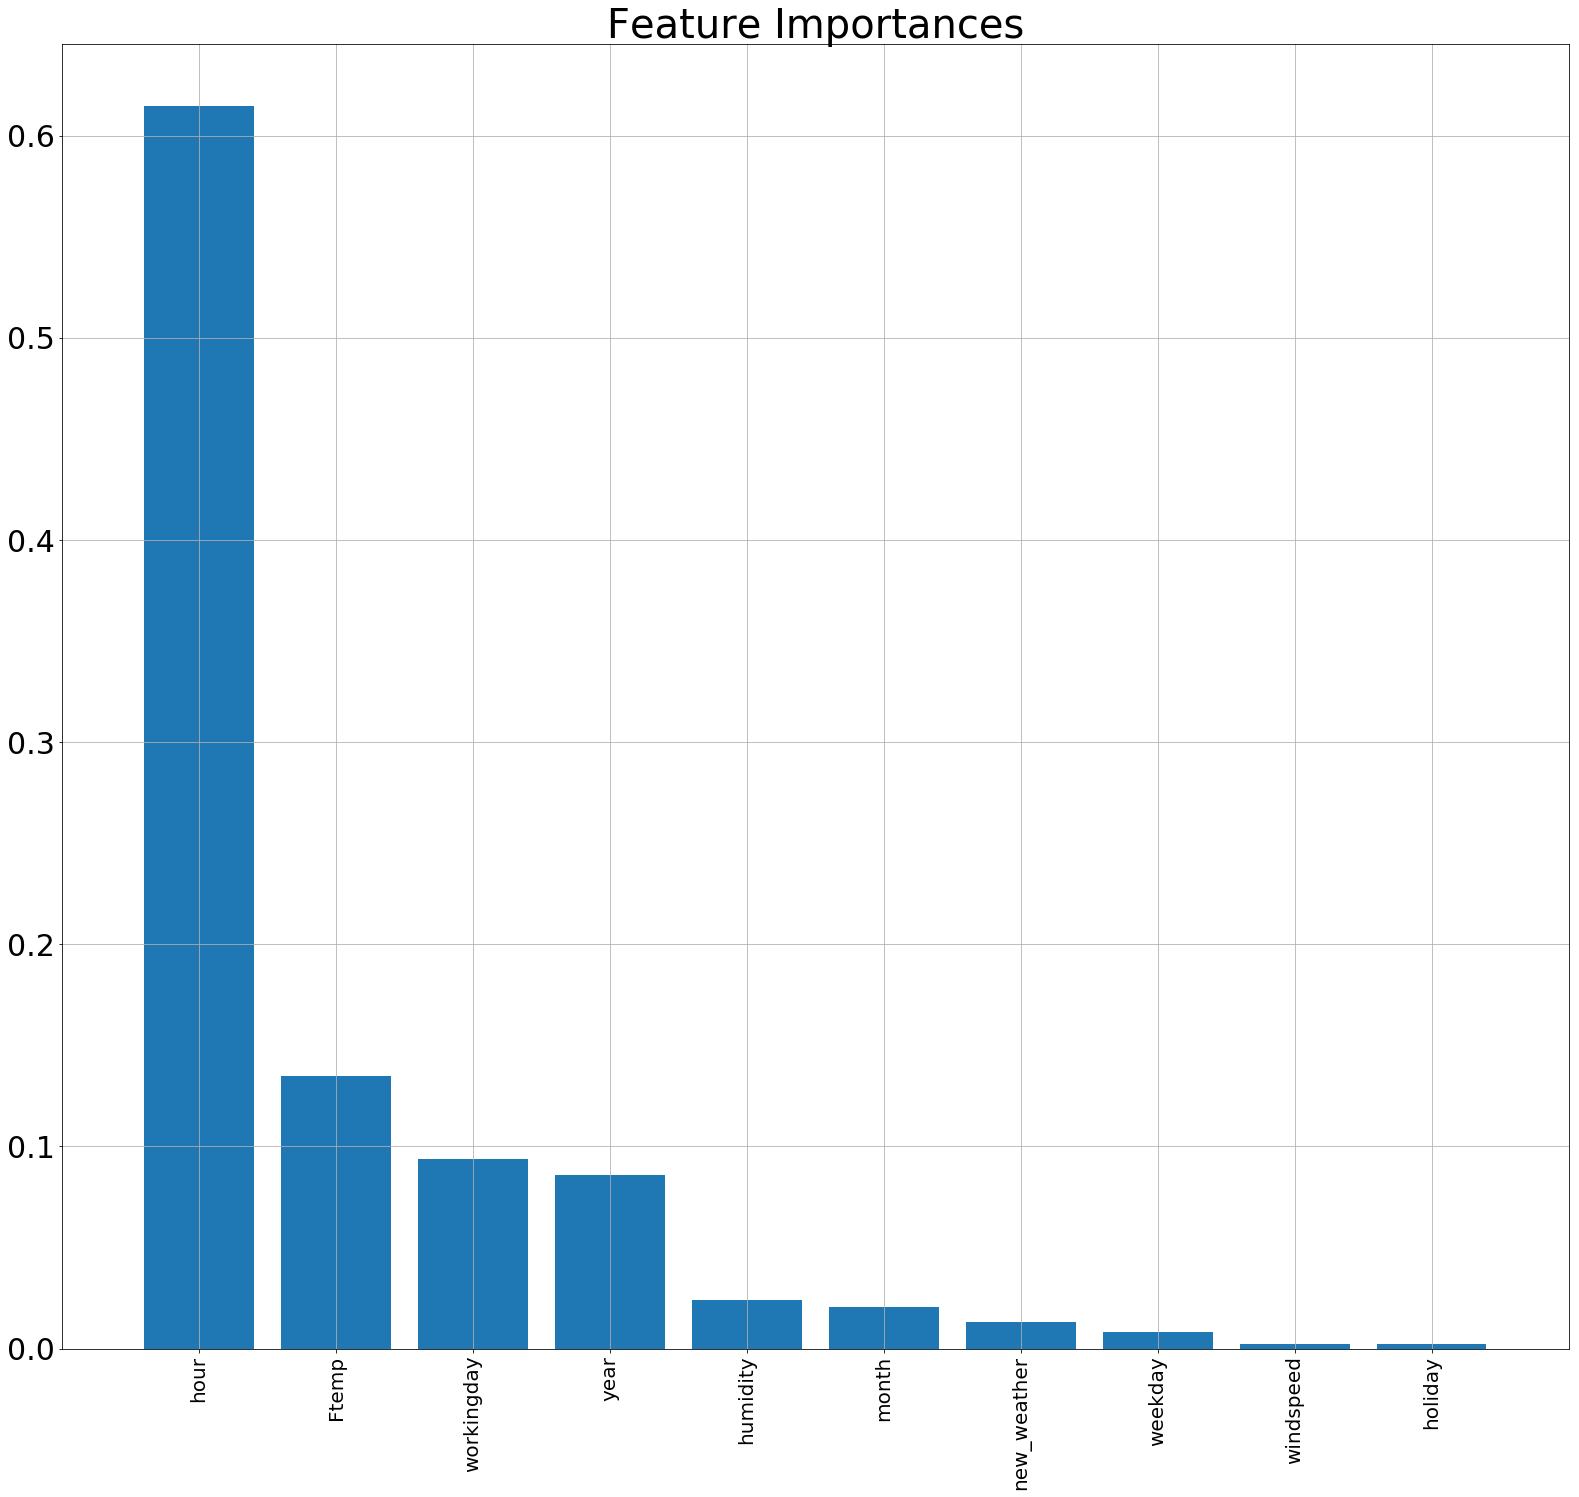

In [198]:
#SciKit Random Forest Regressor - Cross Val


header=header[1:]  # remove count from header
header

start_ts=time.time()
#rgr = RandomForestRegressor( max_features= 0.75,  min_samples_split= 7, n_estimators= 800, random_state=1)
rgr = GradientBoostingRegressor(loss='ls',learning_rate=0.1, n_estimators=1000, min_samples_split=7, min_samples_leaf=2, random_state=rand_st)

rgr.fit(data_train, target_train)
importances = rgr.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
names = [header[i] for i in indices]

# Print the feature ranking
print("Feature ranking:")

for f in range(data_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, header[indices[f]], importances[indices[f]]))
# Plot the feature importances of the forest
plt.subplots(figsize=(27,24))
plt.title('Feature Importances', size = 40)
plt.bar(range(data_train.shape[1]), importances[indices], align="center")


# Add feature names as x-axis labels
plt.xticks(range(data_train.shape[1]), names, rotation=90)
plt.xlim([-1, data_train.shape[1]])
plt.xticks(size = 20)
plt.yticks(size = 30)
plt.grid()
# Show plot
plt.show()

In [40]:
sub_modified_df= modified_df.drop(['month', 'weekday', 'holiday','windspeed', 'new_weather'],axis=1)

In [41]:
sub_modified_df.to_csv("sub_modified_df.csv",  float_format="%1.2f", index = False)

# Hyper-Parameter Tuning

### Decision Tree Hyper-parameter Tuning

In [269]:
# Minimum number of samples required to split a node
min_samples_split  = [5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]

# Minimum number of samples required at each leaf node
min_samples_leaf = [3, 5, 7, 9, 11, 13, 17]

In [270]:
DTrgr = DecisionTreeRegressor(random_state=rand_st)

parameters = {'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf}

DTgs = GridSearchCV(DTrgr, parameters, verbose=2, cv=5)

%time _ = DTgs.fit(data_train, target_train)

#gs.best_params_, gs.best_score_

Fitting 5 folds for each of 98 candidates, totalling 490 fits
[CV] min_samples_leaf=3, min_samples_split=5 .........................
[CV] .......... min_samples_leaf=3, min_samples_split=5, total=   0.0s
[CV] min_samples_leaf=3, min_samples_split=5 .........................
[CV] .......... min_samples_leaf=3, min_samples_split=5, total=   0.0s
[CV] min_samples_leaf=3, min_samples_split=5 .........................
[CV] .......... min_samples_leaf=3, min_samples_split=5, total=   0.0s
[CV] min_samples_leaf=3, min_samples_split=5 .........................
[CV] .......... min_samples_leaf=3, min_samples_split=5, total=   0.0s
[CV] min_samples_leaf=3, min_samples_split=5 .........................
[CV] .......... min_samples_leaf=3, min_samples_split=5, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] min_samples_leaf=3, min_samples_split=7 .........................
[CV] .......... min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] min_samples_leaf=3, min_samples_split=7 .........................
[CV] .......... min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] min_samples_leaf=3, min_samples_split=7 .........................
[CV] .......... min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] min_samples_leaf=3, min_samples_split=7 .........................
[CV] .......... min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] min_samples_leaf=3, min_samples_split=7 .........................
[CV] .......... min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] min_samples_leaf=3, min_samples_split=9 .........................
[CV] .......... min_samples_leaf=3, min_samples_split=9, total=   0.0s
[CV] min_samples_leaf=3, min_samples_split=9 .........................
[CV] .......... min_samples_leaf=3, min_samples_split=9, total=   0.0s
[CV] m

[CV] ......... min_samples_leaf=5, min_samples_split=27, total=   0.0s
[CV] min_samples_leaf=5, min_samples_split=27 ........................
[CV] ......... min_samples_leaf=5, min_samples_split=27, total=   0.0s
[CV] min_samples_leaf=5, min_samples_split=27 ........................
[CV] ......... min_samples_leaf=5, min_samples_split=27, total=   0.0s
[CV] min_samples_leaf=5, min_samples_split=27 ........................
[CV] ......... min_samples_leaf=5, min_samples_split=27, total=   0.0s
[CV] min_samples_leaf=5, min_samples_split=27 ........................
[CV] ......... min_samples_leaf=5, min_samples_split=27, total=   0.0s
[CV] min_samples_leaf=5, min_samples_split=29 ........................
[CV] ......... min_samples_leaf=5, min_samples_split=29, total=   0.0s
[CV] min_samples_leaf=5, min_samples_split=29 ........................
[CV] ......... min_samples_leaf=5, min_samples_split=29, total=   0.0s
[CV] min_samples_leaf=5, min_samples_split=29 ........................
[CV] .

[CV] ......... min_samples_leaf=7, min_samples_split=21, total=   0.0s
[CV] min_samples_leaf=7, min_samples_split=21 ........................
[CV] ......... min_samples_leaf=7, min_samples_split=21, total=   0.0s
[CV] min_samples_leaf=7, min_samples_split=23 ........................
[CV] ......... min_samples_leaf=7, min_samples_split=23, total=   0.0s
[CV] min_samples_leaf=7, min_samples_split=23 ........................
[CV] ......... min_samples_leaf=7, min_samples_split=23, total=   0.0s
[CV] min_samples_leaf=7, min_samples_split=23 ........................
[CV] ......... min_samples_leaf=7, min_samples_split=23, total=   0.0s
[CV] min_samples_leaf=7, min_samples_split=23 ........................
[CV] ......... min_samples_leaf=7, min_samples_split=23, total=   0.0s
[CV] min_samples_leaf=7, min_samples_split=23 ........................
[CV] ......... min_samples_leaf=7, min_samples_split=23, total=   0.0s
[CV] min_samples_leaf=7, min_samples_split=25 ........................
[CV] .

[CV] ......... min_samples_leaf=9, min_samples_split=17, total=   0.0s
[CV] min_samples_leaf=9, min_samples_split=17 ........................
[CV] ......... min_samples_leaf=9, min_samples_split=17, total=   0.0s
[CV] min_samples_leaf=9, min_samples_split=17 ........................
[CV] ......... min_samples_leaf=9, min_samples_split=17, total=   0.0s
[CV] min_samples_leaf=9, min_samples_split=17 ........................
[CV] ......... min_samples_leaf=9, min_samples_split=17, total=   0.0s
[CV] min_samples_leaf=9, min_samples_split=19 ........................
[CV] ......... min_samples_leaf=9, min_samples_split=19, total=   0.0s
[CV] min_samples_leaf=9, min_samples_split=19 ........................
[CV] ......... min_samples_leaf=9, min_samples_split=19, total=   0.0s
[CV] min_samples_leaf=9, min_samples_split=19 ........................
[CV] ......... min_samples_leaf=9, min_samples_split=19, total=   0.0s
[CV] min_samples_leaf=9, min_samples_split=19 ........................
[CV] .

[CV] ........ min_samples_leaf=11, min_samples_split=15, total=   0.0s
[CV] min_samples_leaf=11, min_samples_split=15 .......................
[CV] ........ min_samples_leaf=11, min_samples_split=15, total=   0.0s
[CV] min_samples_leaf=11, min_samples_split=15 .......................
[CV] ........ min_samples_leaf=11, min_samples_split=15, total=   0.0s
[CV] min_samples_leaf=11, min_samples_split=17 .......................
[CV] ........ min_samples_leaf=11, min_samples_split=17, total=   0.0s
[CV] min_samples_leaf=11, min_samples_split=17 .......................
[CV] ........ min_samples_leaf=11, min_samples_split=17, total=   0.0s
[CV] min_samples_leaf=11, min_samples_split=17 .......................
[CV] ........ min_samples_leaf=11, min_samples_split=17, total=   0.0s
[CV] min_samples_leaf=11, min_samples_split=17 .......................
[CV] ........ min_samples_leaf=11, min_samples_split=17, total=   0.0s
[CV] min_samples_leaf=11, min_samples_split=17 .......................
[CV] .

[CV] ........ min_samples_leaf=13, min_samples_split=13, total=   0.0s
[CV] min_samples_leaf=13, min_samples_split=13 .......................
[CV] ........ min_samples_leaf=13, min_samples_split=13, total=   0.0s
[CV] min_samples_leaf=13, min_samples_split=15 .......................
[CV] ........ min_samples_leaf=13, min_samples_split=15, total=   0.0s
[CV] min_samples_leaf=13, min_samples_split=15 .......................
[CV] ........ min_samples_leaf=13, min_samples_split=15, total=   0.0s
[CV] min_samples_leaf=13, min_samples_split=15 .......................
[CV] ........ min_samples_leaf=13, min_samples_split=15, total=   0.0s
[CV] min_samples_leaf=13, min_samples_split=15 .......................
[CV] ........ min_samples_leaf=13, min_samples_split=15, total=   0.0s
[CV] min_samples_leaf=13, min_samples_split=15 .......................
[CV] ........ min_samples_leaf=13, min_samples_split=15, total=   0.0s
[CV] min_samples_leaf=13, min_samples_split=17 .......................
[CV] .

[CV] ......... min_samples_leaf=17, min_samples_split=9, total=   0.0s
[CV] min_samples_leaf=17, min_samples_split=9 ........................
[CV] ......... min_samples_leaf=17, min_samples_split=9, total=   0.0s
[CV] min_samples_leaf=17, min_samples_split=9 ........................
[CV] ......... min_samples_leaf=17, min_samples_split=9, total=   0.0s
[CV] min_samples_leaf=17, min_samples_split=9 ........................
[CV] ......... min_samples_leaf=17, min_samples_split=9, total=   0.0s
[CV] min_samples_leaf=17, min_samples_split=11 .......................
[CV] ........ min_samples_leaf=17, min_samples_split=11, total=   0.0s
[CV] min_samples_leaf=17, min_samples_split=11 .......................
[CV] ........ min_samples_leaf=17, min_samples_split=11, total=   0.0s
[CV] min_samples_leaf=17, min_samples_split=11 .......................
[CV] ........ min_samples_leaf=17, min_samples_split=11, total=   0.0s
[CV] min_samples_leaf=17, min_samples_split=11 .......................
[CV] .

[Parallel(n_jobs=1)]: Done 490 out of 490 | elapsed:   13.0s finished


In [271]:
DTgs.best_params_, DTgs.best_score_

({'min_samples_leaf': 5, 'min_samples_split': 31}, 0.9028212095678239)

In [19]:
## Running the cross-validation with hypertuned parameters

In [273]:
#SciKit Gradient Boosting - Cross Val
start_ts=time.time()
rgr = DecisionTreeRegressor(criterion='mse',min_samples_split=31, min_samples_leaf=5, random_state=rand_st)
scores = cross_validate(rgr, data_train, target_train, scoring=scorers, cv=5)                                                                                              

scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])                                       #Turns negative MSE scores into RMSE
scores_Expl_Var = scores['test_expl_var']
print("Gradient Boosting RMSE: %0.2f (+/- %0.2f)" % ((scores_RMSE.mean()), (scores_RMSE.std() * 2)))
print("Gradient Boosting Expl Var: %0.2f (+/- %0.2f)" % ((scores_Expl_Var.mean()), (scores_Expl_Var.std() * 2)))
print("CV Runtime:", time.time()-start_ts)
print('\n')    

Gradient Boosting RMSE: 56.41 (+/- 3.80)
Gradient Boosting Expl Var: 0.90 (+/- 0.01)
CV Runtime: 0.14086413383483887




### Random FOrest Hyper-parameter Tuning

In [253]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = [.33, 0.5, 0.75]
# Maximum number of levels in tree
#max_depth = [10, 20]
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [7, 9, 13, 15]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [ 1, 3, 5]

In [254]:
RFrgr = RandomForestRegressor(random_state=rand_st)

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]

parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_split': min_samples_split}

RFgs = GridSearchCV(RFrgr, parameters, verbose=2, cv=5)

%time _ = RFgs.fit(data_train, target_train)

#gs.best_params_, gs.best_score_

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] max_features=0.33, min_samples_split=7, n_estimators=100 ........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_features=0.33, min_samples_split=7, n_estimators=100, total=   0.7s
[CV] max_features=0.33, min_samples_split=7, n_estimators=100 ........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  max_features=0.33, min_samples_split=7, n_estimators=100, total=   0.6s
[CV] max_features=0.33, min_samples_split=7, n_estimators=100 ........
[CV]  max_features=0.33, min_samples_split=7, n_estimators=100, total=   0.7s
[CV] max_features=0.33, min_samples_split=7, n_estimators=100 ........
[CV]  max_features=0.33, min_samples_split=7, n_estimators=100, total=   0.6s
[CV] max_features=0.33, min_samples_split=7, n_estimators=100 ........
[CV]  max_features=0.33, min_samples_split=7, n_estimators=100, total=   0.6s
[CV] max_features=0.33, min_samples_split=7, n_estimators=200 ........
[CV]  max_features=0.33, min_samples_split=7, n_estimators=200, total=   1.2s
[CV] max_features=0.33, min_samples_split=7, n_estimators=200 ........
[CV]  max_features=0.33, min_samples_split=7, n_estimators=200, total=   1.2s
[CV] max_features=0.33, min_samples_split=7, n_estimators=200 ........
[CV]  max_features=0.33, min_samples_split=7, n_estimators=200, total=   1.2s
[CV] max_features=0.33, min_

[CV]  max_features=0.33, min_samples_split=9, n_estimators=200, total=   1.2s
[CV] max_features=0.33, min_samples_split=9, n_estimators=200 ........
[CV]  max_features=0.33, min_samples_split=9, n_estimators=200, total=   1.2s
[CV] max_features=0.33, min_samples_split=9, n_estimators=200 ........
[CV]  max_features=0.33, min_samples_split=9, n_estimators=200, total=   1.2s
[CV] max_features=0.33, min_samples_split=9, n_estimators=200 ........
[CV]  max_features=0.33, min_samples_split=9, n_estimators=200, total=   1.2s
[CV] max_features=0.33, min_samples_split=9, n_estimators=300 ........
[CV]  max_features=0.33, min_samples_split=9, n_estimators=300, total=   1.9s
[CV] max_features=0.33, min_samples_split=9, n_estimators=300 ........
[CV]  max_features=0.33, min_samples_split=9, n_estimators=300, total=   1.9s
[CV] max_features=0.33, min_samples_split=9, n_estimators=300 ........
[CV]  max_features=0.33, min_samples_split=9, n_estimators=300, total=   1.9s
[CV] max_features=0.33, min_

[CV]  max_features=0.33, min_samples_split=13, n_estimators=300, total=   1.8s
[CV] max_features=0.33, min_samples_split=13, n_estimators=300 .......
[CV]  max_features=0.33, min_samples_split=13, n_estimators=300, total=   1.7s
[CV] max_features=0.33, min_samples_split=13, n_estimators=300 .......
[CV]  max_features=0.33, min_samples_split=13, n_estimators=300, total=   1.7s
[CV] max_features=0.33, min_samples_split=13, n_estimators=300 .......
[CV]  max_features=0.33, min_samples_split=13, n_estimators=300, total=   1.7s
[CV] max_features=0.33, min_samples_split=13, n_estimators=400 .......
[CV]  max_features=0.33, min_samples_split=13, n_estimators=400, total=   2.5s
[CV] max_features=0.33, min_samples_split=13, n_estimators=400 .......
[CV]  max_features=0.33, min_samples_split=13, n_estimators=400, total=   2.3s
[CV] max_features=0.33, min_samples_split=13, n_estimators=400 .......
[CV]  max_features=0.33, min_samples_split=13, n_estimators=400, total=   2.3s
[CV] max_features=0.3

[CV]  max_features=0.33, min_samples_split=15, n_estimators=400, total=   2.2s
[CV] max_features=0.33, min_samples_split=15, n_estimators=400 .......
[CV]  max_features=0.33, min_samples_split=15, n_estimators=400, total=   2.4s
[CV] max_features=0.33, min_samples_split=15, n_estimators=400 .......
[CV]  max_features=0.33, min_samples_split=15, n_estimators=400, total=   2.4s
[CV] max_features=0.33, min_samples_split=15, n_estimators=400 .......
[CV]  max_features=0.33, min_samples_split=15, n_estimators=400, total=   2.4s
[CV] max_features=0.33, min_samples_split=15, n_estimators=500 .......
[CV]  max_features=0.33, min_samples_split=15, n_estimators=500, total=   3.1s
[CV] max_features=0.33, min_samples_split=15, n_estimators=500 .......
[CV]  max_features=0.33, min_samples_split=15, n_estimators=500, total=   2.7s
[CV] max_features=0.33, min_samples_split=15, n_estimators=500 .......
[CV]  max_features=0.33, min_samples_split=15, n_estimators=500, total=   2.9s
[CV] max_features=0.3

[CV]  max_features=0.5, min_samples_split=7, n_estimators=500, total=   4.5s
[CV] max_features=0.5, min_samples_split=7, n_estimators=500 .........
[CV]  max_features=0.5, min_samples_split=7, n_estimators=500, total=   4.7s
[CV] max_features=0.5, min_samples_split=7, n_estimators=500 .........
[CV]  max_features=0.5, min_samples_split=7, n_estimators=500, total=   4.6s
[CV] max_features=0.5, min_samples_split=7, n_estimators=500 .........
[CV]  max_features=0.5, min_samples_split=7, n_estimators=500, total=   5.2s
[CV] max_features=0.5, min_samples_split=7, n_estimators=600 .........
[CV]  max_features=0.5, min_samples_split=7, n_estimators=600, total=   6.4s
[CV] max_features=0.5, min_samples_split=7, n_estimators=600 .........
[CV]  max_features=0.5, min_samples_split=7, n_estimators=600, total=   5.9s
[CV] max_features=0.5, min_samples_split=7, n_estimators=600 .........
[CV]  max_features=0.5, min_samples_split=7, n_estimators=600, total=   5.7s
[CV] max_features=0.5, min_samples_

[CV]  max_features=0.5, min_samples_split=9, n_estimators=600, total=   4.7s
[CV] max_features=0.5, min_samples_split=9, n_estimators=600 .........
[CV]  max_features=0.5, min_samples_split=9, n_estimators=600, total=   4.9s
[CV] max_features=0.5, min_samples_split=9, n_estimators=600 .........
[CV]  max_features=0.5, min_samples_split=9, n_estimators=600, total=   4.8s
[CV] max_features=0.5, min_samples_split=9, n_estimators=700 .........
[CV]  max_features=0.5, min_samples_split=9, n_estimators=700, total=   5.5s
[CV] max_features=0.5, min_samples_split=9, n_estimators=700 .........
[CV]  max_features=0.5, min_samples_split=9, n_estimators=700, total=   5.5s
[CV] max_features=0.5, min_samples_split=9, n_estimators=700 .........
[CV]  max_features=0.5, min_samples_split=9, n_estimators=700, total=   5.5s
[CV] max_features=0.5, min_samples_split=9, n_estimators=700 .........
[CV]  max_features=0.5, min_samples_split=9, n_estimators=700, total=   5.9s
[CV] max_features=0.5, min_samples_

[CV]  max_features=0.5, min_samples_split=13, n_estimators=700, total=   5.3s
[CV] max_features=0.5, min_samples_split=13, n_estimators=700 ........
[CV]  max_features=0.5, min_samples_split=13, n_estimators=700, total=   5.3s
[CV] max_features=0.5, min_samples_split=13, n_estimators=800 ........
[CV]  max_features=0.5, min_samples_split=13, n_estimators=800, total=   6.3s
[CV] max_features=0.5, min_samples_split=13, n_estimators=800 ........
[CV]  max_features=0.5, min_samples_split=13, n_estimators=800, total=   6.4s
[CV] max_features=0.5, min_samples_split=13, n_estimators=800 ........
[CV]  max_features=0.5, min_samples_split=13, n_estimators=800, total=   6.4s
[CV] max_features=0.5, min_samples_split=13, n_estimators=800 ........
[CV]  max_features=0.5, min_samples_split=13, n_estimators=800, total=   6.3s
[CV] max_features=0.5, min_samples_split=13, n_estimators=800 ........
[CV]  max_features=0.5, min_samples_split=13, n_estimators=800, total=   6.6s
[CV] max_features=0.5, min_s

[CV]  max_features=0.5, min_samples_split=15, n_estimators=800, total=   5.9s
[CV] max_features=0.5, min_samples_split=15, n_estimators=800 ........
[CV]  max_features=0.5, min_samples_split=15, n_estimators=800, total=   6.0s
[CV] max_features=0.5, min_samples_split=15, n_estimators=900 ........
[CV]  max_features=0.5, min_samples_split=15, n_estimators=900, total=   6.5s
[CV] max_features=0.5, min_samples_split=15, n_estimators=900 ........
[CV]  max_features=0.5, min_samples_split=15, n_estimators=900, total=   6.7s
[CV] max_features=0.5, min_samples_split=15, n_estimators=900 ........
[CV]  max_features=0.5, min_samples_split=15, n_estimators=900, total=   6.5s
[CV] max_features=0.5, min_samples_split=15, n_estimators=900 ........
[CV]  max_features=0.5, min_samples_split=15, n_estimators=900, total=   6.8s
[CV] max_features=0.5, min_samples_split=15, n_estimators=900 ........
[CV]  max_features=0.5, min_samples_split=15, n_estimators=900, total=   6.8s
[CV] max_features=0.5, min_s

[CV]  max_features=0.75, min_samples_split=7, n_estimators=900, total=  12.6s
[CV] max_features=0.75, min_samples_split=7, n_estimators=900 ........
[CV]  max_features=0.75, min_samples_split=7, n_estimators=900, total=  12.5s
[CV] max_features=0.75, min_samples_split=7, n_estimators=1000 .......
[CV]  max_features=0.75, min_samples_split=7, n_estimators=1000, total=  14.0s
[CV] max_features=0.75, min_samples_split=7, n_estimators=1000 .......
[CV]  max_features=0.75, min_samples_split=7, n_estimators=1000, total=  13.7s
[CV] max_features=0.75, min_samples_split=7, n_estimators=1000 .......
[CV]  max_features=0.75, min_samples_split=7, n_estimators=1000, total=  13.8s
[CV] max_features=0.75, min_samples_split=7, n_estimators=1000 .......
[CV]  max_features=0.75, min_samples_split=7, n_estimators=1000, total=  13.7s
[CV] max_features=0.75, min_samples_split=7, n_estimators=1000 .......
[CV]  max_features=0.75, min_samples_split=7, n_estimators=1000, total=  13.5s
[CV] max_features=0.75,

[CV]  max_features=0.75, min_samples_split=9, n_estimators=1000, total=  11.8s
[CV] max_features=0.75, min_samples_split=9, n_estimators=1000 .......
[CV]  max_features=0.75, min_samples_split=9, n_estimators=1000, total=  11.6s
[CV] max_features=0.75, min_samples_split=13, n_estimators=100 .......
[CV]  max_features=0.75, min_samples_split=13, n_estimators=100, total=   1.0s
[CV] max_features=0.75, min_samples_split=13, n_estimators=100 .......
[CV]  max_features=0.75, min_samples_split=13, n_estimators=100, total=   1.0s
[CV] max_features=0.75, min_samples_split=13, n_estimators=100 .......
[CV]  max_features=0.75, min_samples_split=13, n_estimators=100, total=   1.0s
[CV] max_features=0.75, min_samples_split=13, n_estimators=100 .......
[CV]  max_features=0.75, min_samples_split=13, n_estimators=100, total=   1.0s
[CV] max_features=0.75, min_samples_split=13, n_estimators=100 .......
[CV]  max_features=0.75, min_samples_split=13, n_estimators=100, total=   1.0s
[CV] max_features=0.7

[CV]  max_features=0.75, min_samples_split=15, n_estimators=100, total=   1.0s
[CV] max_features=0.75, min_samples_split=15, n_estimators=100 .......
[CV]  max_features=0.75, min_samples_split=15, n_estimators=100, total=   1.0s
[CV] max_features=0.75, min_samples_split=15, n_estimators=200 .......
[CV]  max_features=0.75, min_samples_split=15, n_estimators=200, total=   2.1s
[CV] max_features=0.75, min_samples_split=15, n_estimators=200 .......
[CV]  max_features=0.75, min_samples_split=15, n_estimators=200, total=   2.2s
[CV] max_features=0.75, min_samples_split=15, n_estimators=200 .......
[CV]  max_features=0.75, min_samples_split=15, n_estimators=200, total=   2.1s
[CV] max_features=0.75, min_samples_split=15, n_estimators=200 .......
[CV]  max_features=0.75, min_samples_split=15, n_estimators=200, total=   2.1s
[CV] max_features=0.75, min_samples_split=15, n_estimators=200 .......
[CV]  max_features=0.75, min_samples_split=15, n_estimators=200, total=   2.1s
[CV] max_features=0.7

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed: 57.6min finished


Wall time: 57min 50s


In [255]:
#second run
RFgs.best_params_, RFgs.best_score_

({'max_features': 0.75, 'min_samples_split': 7, 'n_estimators': 1000},
 0.9276373195601332)

In [80]:
#rgr = RandomForestRegressor(max_depth= 20, max_features= .05, min_samples_leaf= 5, min_samples_split= 5, n_estimators= 300, random_state=1)  
rgr = RandomForestRegressor( max_features= 0.75,  min_samples_split= 7, n_estimators= 1000, random_state=1)  
scores = cross_validate(rgr, data_train, target_train, scoring=scorers, cv=5)

scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])                                       #Turns negative MSE scores into RMSE
scores_Expl_Var = scores['test_expl_var']
print("Random Forest RMSE: %0.2f (+/- %0.2f)" % ((scores_RMSE.mean()), (scores_RMSE.std() * 2)))
print("Random Forest Expl Var: %0.2f (+/- %0.2f)" % ((scores_Expl_Var.mean()), (scores_Expl_Var.std() * 2)))
print("CV Runtime:", time.time()-start_ts)
print('\n') 

Random Forest RMSE: 48.67 (+/- 2.33)
Random Forest Expl Var: 0.93 (+/- 0.01)
CV Runtime: 295.05516290664673




### Gradient Boosting Hyper-parameter Tuning

In [262]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 5)]
# Number of features to consider at every split
#loss = ['ls', 'lad', 'huber']
# learning rates
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Maximum number of levels in tree
max_depth = [1, 2, 3]
# Minimum number of samples required to split a node
min_samples_split = [3, 5, 7, 10]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [2, 4, 6]

In [263]:
GBrgr = GradientBoostingRegressor(random_state=rand_st)

parameters = {'n_estimators': n_estimators,
              'learning_rate': learning_rate,
              'max_depth': max_depth,
               'min_samples_split': min_samples_split}

GBgs = GridSearchCV(GBrgr, parameters, verbose=2, cv=5)

%time _ = GBgs.fit(data_train, target_train)

#gs.best_params_, gs.best_score_

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV] learning_rate=0.001, max_depth=1, min_samples_split=3, n_estimators=100 
[CV]  learning_rate=0.001, max_depth=1, min_samples_split=3, n_estimators=100, total=   0.0s
[CV] learning_rate=0.001, max_depth=1, min_samples_split=3, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  learning_rate=0.001, max_depth=1, min_samples_split=3, n_estimators=100, total=   0.1s
[CV] learning_rate=0.001, max_depth=1, min_samples_split=3, n_estimators=100 
[CV]  learning_rate=0.001, max_depth=1, min_samples_split=3, n_estimators=100, total=   0.0s
[CV] learning_rate=0.001, max_depth=1, min_samples_split=3, n_estimators=100 
[CV]  learning_rate=0.001, max_depth=1, min_samples_split=3, n_estimators=100, total=   0.0s
[CV] learning_rate=0.001, max_depth=1, min_samples_split=3, n_estimators=100 
[CV]  learning_rate=0.001, max_depth=1, min_samples_split=3, n_estimators=100, total=   0.0s
[CV] learning_rate=0.001, max_depth=1, min_samples_split=3, n_estimators=325 
[CV]  learning_rate=0.001, max_depth=1, min_samples_split=3, n_estimators=325, total=   0.3s
[CV] learning_rate=0.001, max_depth=1, min_samples_split=3, n_estimators=325 
[CV]  learning_rate=0.001, max_depth=1, min_samples_split=3, n_estimators=325, total=   0.3s
[CV] learning_rate=0.001, max_depth=1, min_samples_s

[CV]  learning_rate=0.001, max_depth=1, min_samples_split=5, n_estimators=1000, total=   0.9s
[CV] learning_rate=0.001, max_depth=1, min_samples_split=7, n_estimators=100 
[CV]  learning_rate=0.001, max_depth=1, min_samples_split=7, n_estimators=100, total=   0.0s
[CV] learning_rate=0.001, max_depth=1, min_samples_split=7, n_estimators=100 
[CV]  learning_rate=0.001, max_depth=1, min_samples_split=7, n_estimators=100, total=   0.0s
[CV] learning_rate=0.001, max_depth=1, min_samples_split=7, n_estimators=100 
[CV]  learning_rate=0.001, max_depth=1, min_samples_split=7, n_estimators=100, total=   0.1s
[CV] learning_rate=0.001, max_depth=1, min_samples_split=7, n_estimators=100 
[CV]  learning_rate=0.001, max_depth=1, min_samples_split=7, n_estimators=100, total=   0.0s
[CV] learning_rate=0.001, max_depth=1, min_samples_split=7, n_estimators=100 
[CV]  learning_rate=0.001, max_depth=1, min_samples_split=7, n_estimators=100, total=   0.0s
[CV] learning_rate=0.001, max_depth=1, min_samples_

[CV]  learning_rate=0.001, max_depth=1, min_samples_split=10, n_estimators=1000, total=   1.0s
[CV] learning_rate=0.001, max_depth=1, min_samples_split=10, n_estimators=1000 
[CV]  learning_rate=0.001, max_depth=1, min_samples_split=10, n_estimators=1000, total=   1.3s
[CV] learning_rate=0.001, max_depth=1, min_samples_split=10, n_estimators=1000 
[CV]  learning_rate=0.001, max_depth=1, min_samples_split=10, n_estimators=1000, total=   0.9s
[CV] learning_rate=0.001, max_depth=2, min_samples_split=3, n_estimators=100 
[CV]  learning_rate=0.001, max_depth=2, min_samples_split=3, n_estimators=100, total=   0.1s
[CV] learning_rate=0.001, max_depth=2, min_samples_split=3, n_estimators=100 
[CV]  learning_rate=0.001, max_depth=2, min_samples_split=3, n_estimators=100, total=   0.1s
[CV] learning_rate=0.001, max_depth=2, min_samples_split=3, n_estimators=100 
[CV]  learning_rate=0.001, max_depth=2, min_samples_split=3, n_estimators=100, total=   0.1s
[CV] learning_rate=0.001, max_depth=2, min

[CV]  learning_rate=0.001, max_depth=2, min_samples_split=5, n_estimators=1000, total=   2.1s
[CV] learning_rate=0.001, max_depth=2, min_samples_split=5, n_estimators=1000 
[CV]  learning_rate=0.001, max_depth=2, min_samples_split=5, n_estimators=1000, total=   2.1s
[CV] learning_rate=0.001, max_depth=2, min_samples_split=5, n_estimators=1000 
[CV]  learning_rate=0.001, max_depth=2, min_samples_split=5, n_estimators=1000, total=   2.1s
[CV] learning_rate=0.001, max_depth=2, min_samples_split=5, n_estimators=1000 
[CV]  learning_rate=0.001, max_depth=2, min_samples_split=5, n_estimators=1000, total=   2.1s
[CV] learning_rate=0.001, max_depth=2, min_samples_split=5, n_estimators=1000 
[CV]  learning_rate=0.001, max_depth=2, min_samples_split=5, n_estimators=1000, total=   2.3s
[CV] learning_rate=0.001, max_depth=2, min_samples_split=7, n_estimators=100 
[CV]  learning_rate=0.001, max_depth=2, min_samples_split=7, n_estimators=100, total=   0.1s
[CV] learning_rate=0.001, max_depth=2, min_

[CV]  learning_rate=0.001, max_depth=2, min_samples_split=10, n_estimators=775, total=   1.9s
[CV] learning_rate=0.001, max_depth=2, min_samples_split=10, n_estimators=775 
[CV]  learning_rate=0.001, max_depth=2, min_samples_split=10, n_estimators=775, total=   1.8s
[CV] learning_rate=0.001, max_depth=2, min_samples_split=10, n_estimators=1000 
[CV]  learning_rate=0.001, max_depth=2, min_samples_split=10, n_estimators=1000, total=   2.3s
[CV] learning_rate=0.001, max_depth=2, min_samples_split=10, n_estimators=1000 
[CV]  learning_rate=0.001, max_depth=2, min_samples_split=10, n_estimators=1000, total=   2.4s
[CV] learning_rate=0.001, max_depth=2, min_samples_split=10, n_estimators=1000 
[CV]  learning_rate=0.001, max_depth=2, min_samples_split=10, n_estimators=1000, total=   2.5s
[CV] learning_rate=0.001, max_depth=2, min_samples_split=10, n_estimators=1000 
[CV]  learning_rate=0.001, max_depth=2, min_samples_split=10, n_estimators=1000, total=   2.3s
[CV] learning_rate=0.001, max_dep

[CV]  learning_rate=0.001, max_depth=3, min_samples_split=5, n_estimators=775, total=   2.6s
[CV] learning_rate=0.001, max_depth=3, min_samples_split=5, n_estimators=775 
[CV]  learning_rate=0.001, max_depth=3, min_samples_split=5, n_estimators=775, total=   2.6s
[CV] learning_rate=0.001, max_depth=3, min_samples_split=5, n_estimators=775 
[CV]  learning_rate=0.001, max_depth=3, min_samples_split=5, n_estimators=775, total=   2.6s
[CV] learning_rate=0.001, max_depth=3, min_samples_split=5, n_estimators=775 
[CV]  learning_rate=0.001, max_depth=3, min_samples_split=5, n_estimators=775, total=   2.7s
[CV] learning_rate=0.001, max_depth=3, min_samples_split=5, n_estimators=1000 
[CV]  learning_rate=0.001, max_depth=3, min_samples_split=5, n_estimators=1000, total=   3.4s
[CV] learning_rate=0.001, max_depth=3, min_samples_split=5, n_estimators=1000 
[CV]  learning_rate=0.001, max_depth=3, min_samples_split=5, n_estimators=1000, total=   3.4s
[CV] learning_rate=0.001, max_depth=3, min_sampl

[CV]  learning_rate=0.001, max_depth=3, min_samples_split=10, n_estimators=550, total=   1.8s
[CV] learning_rate=0.001, max_depth=3, min_samples_split=10, n_estimators=775 
[CV]  learning_rate=0.001, max_depth=3, min_samples_split=10, n_estimators=775, total=   2.7s
[CV] learning_rate=0.001, max_depth=3, min_samples_split=10, n_estimators=775 
[CV]  learning_rate=0.001, max_depth=3, min_samples_split=10, n_estimators=775, total=   2.7s
[CV] learning_rate=0.001, max_depth=3, min_samples_split=10, n_estimators=775 
[CV]  learning_rate=0.001, max_depth=3, min_samples_split=10, n_estimators=775, total=   2.7s
[CV] learning_rate=0.001, max_depth=3, min_samples_split=10, n_estimators=775 
[CV]  learning_rate=0.001, max_depth=3, min_samples_split=10, n_estimators=775, total=   2.6s
[CV] learning_rate=0.001, max_depth=3, min_samples_split=10, n_estimators=775 
[CV]  learning_rate=0.001, max_depth=3, min_samples_split=10, n_estimators=775, total=   2.6s
[CV] learning_rate=0.001, max_depth=3, mi

[CV]  learning_rate=0.01, max_depth=1, min_samples_split=5, n_estimators=550, total=   0.5s
[CV] learning_rate=0.01, max_depth=1, min_samples_split=5, n_estimators=550 
[CV]  learning_rate=0.01, max_depth=1, min_samples_split=5, n_estimators=550, total=   0.5s
[CV] learning_rate=0.01, max_depth=1, min_samples_split=5, n_estimators=775 
[CV]  learning_rate=0.01, max_depth=1, min_samples_split=5, n_estimators=775, total=   0.7s
[CV] learning_rate=0.01, max_depth=1, min_samples_split=5, n_estimators=775 
[CV]  learning_rate=0.01, max_depth=1, min_samples_split=5, n_estimators=775, total=   0.7s
[CV] learning_rate=0.01, max_depth=1, min_samples_split=5, n_estimators=775 
[CV]  learning_rate=0.01, max_depth=1, min_samples_split=5, n_estimators=775, total=   0.7s
[CV] learning_rate=0.01, max_depth=1, min_samples_split=5, n_estimators=775 
[CV]  learning_rate=0.01, max_depth=1, min_samples_split=5, n_estimators=775, total=   0.7s
[CV] learning_rate=0.01, max_depth=1, min_samples_split=5, n_es

[CV]  learning_rate=0.01, max_depth=1, min_samples_split=10, n_estimators=550, total=   0.6s
[CV] learning_rate=0.01, max_depth=1, min_samples_split=10, n_estimators=550 
[CV]  learning_rate=0.01, max_depth=1, min_samples_split=10, n_estimators=550, total=   0.5s
[CV] learning_rate=0.01, max_depth=1, min_samples_split=10, n_estimators=550 
[CV]  learning_rate=0.01, max_depth=1, min_samples_split=10, n_estimators=550, total=   0.5s
[CV] learning_rate=0.01, max_depth=1, min_samples_split=10, n_estimators=775 
[CV]  learning_rate=0.01, max_depth=1, min_samples_split=10, n_estimators=775, total=   0.7s
[CV] learning_rate=0.01, max_depth=1, min_samples_split=10, n_estimators=775 
[CV]  learning_rate=0.01, max_depth=1, min_samples_split=10, n_estimators=775, total=   0.7s
[CV] learning_rate=0.01, max_depth=1, min_samples_split=10, n_estimators=775 
[CV]  learning_rate=0.01, max_depth=1, min_samples_split=10, n_estimators=775, total=   0.7s
[CV] learning_rate=0.01, max_depth=1, min_samples_sp

[CV]  learning_rate=0.01, max_depth=2, min_samples_split=5, n_estimators=550, total=   1.2s
[CV] learning_rate=0.01, max_depth=2, min_samples_split=5, n_estimators=550 
[CV]  learning_rate=0.01, max_depth=2, min_samples_split=5, n_estimators=550, total=   1.1s
[CV] learning_rate=0.01, max_depth=2, min_samples_split=5, n_estimators=550 
[CV]  learning_rate=0.01, max_depth=2, min_samples_split=5, n_estimators=550, total=   1.2s
[CV] learning_rate=0.01, max_depth=2, min_samples_split=5, n_estimators=550 
[CV]  learning_rate=0.01, max_depth=2, min_samples_split=5, n_estimators=550, total=   1.2s
[CV] learning_rate=0.01, max_depth=2, min_samples_split=5, n_estimators=775 
[CV]  learning_rate=0.01, max_depth=2, min_samples_split=5, n_estimators=775, total=   1.6s
[CV] learning_rate=0.01, max_depth=2, min_samples_split=5, n_estimators=775 
[CV]  learning_rate=0.01, max_depth=2, min_samples_split=5, n_estimators=775, total=   1.7s
[CV] learning_rate=0.01, max_depth=2, min_samples_split=5, n_es

[CV]  learning_rate=0.01, max_depth=2, min_samples_split=10, n_estimators=550, total=   1.1s
[CV] learning_rate=0.01, max_depth=2, min_samples_split=10, n_estimators=550 
[CV]  learning_rate=0.01, max_depth=2, min_samples_split=10, n_estimators=550, total=   1.1s
[CV] learning_rate=0.01, max_depth=2, min_samples_split=10, n_estimators=550 
[CV]  learning_rate=0.01, max_depth=2, min_samples_split=10, n_estimators=550, total=   1.0s
[CV] learning_rate=0.01, max_depth=2, min_samples_split=10, n_estimators=550 
[CV]  learning_rate=0.01, max_depth=2, min_samples_split=10, n_estimators=550, total=   1.1s
[CV] learning_rate=0.01, max_depth=2, min_samples_split=10, n_estimators=550 
[CV]  learning_rate=0.01, max_depth=2, min_samples_split=10, n_estimators=550, total=   1.1s
[CV] learning_rate=0.01, max_depth=2, min_samples_split=10, n_estimators=775 
[CV]  learning_rate=0.01, max_depth=2, min_samples_split=10, n_estimators=775, total=   1.5s
[CV] learning_rate=0.01, max_depth=2, min_samples_sp

[CV]  learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=325, total=   1.1s
[CV] learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=550 
[CV]  learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=550, total=   2.0s
[CV] learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=550 
[CV]  learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=550, total=   1.8s
[CV] learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=550 
[CV]  learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=550, total=   1.8s
[CV] learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=550 
[CV]  learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=550, total=   1.8s
[CV] learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=550 
[CV]  learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=550, total=   2.0s
[CV] learning_rate=0.01, max_depth=3, min_samples_split=5, n_es

[CV]  learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=325, total=   1.1s
[CV] learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=325 
[CV]  learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=325, total=   1.1s
[CV] learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=550 
[CV]  learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=550, total=   1.9s
[CV] learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=550 
[CV]  learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=550, total=   2.0s
[CV] learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=550 
[CV]  learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=550, total=   1.8s
[CV] learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=550 
[CV]  learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=550, total=   1.8s
[CV] learning_rate=0.01, max_depth=3, min_samples_sp

[CV]  learning_rate=0.1, max_depth=1, min_samples_split=5, n_estimators=325, total=   0.3s
[CV] learning_rate=0.1, max_depth=1, min_samples_split=5, n_estimators=325 
[CV]  learning_rate=0.1, max_depth=1, min_samples_split=5, n_estimators=325, total=   0.2s
[CV] learning_rate=0.1, max_depth=1, min_samples_split=5, n_estimators=325 
[CV]  learning_rate=0.1, max_depth=1, min_samples_split=5, n_estimators=325, total=   0.2s
[CV] learning_rate=0.1, max_depth=1, min_samples_split=5, n_estimators=550 
[CV]  learning_rate=0.1, max_depth=1, min_samples_split=5, n_estimators=550, total=   0.5s
[CV] learning_rate=0.1, max_depth=1, min_samples_split=5, n_estimators=550 
[CV]  learning_rate=0.1, max_depth=1, min_samples_split=5, n_estimators=550, total=   0.5s
[CV] learning_rate=0.1, max_depth=1, min_samples_split=5, n_estimators=550 
[CV]  learning_rate=0.1, max_depth=1, min_samples_split=5, n_estimators=550, total=   0.5s
[CV] learning_rate=0.1, max_depth=1, min_samples_split=5, n_estimators=550

[CV]  learning_rate=0.1, max_depth=1, min_samples_split=10, n_estimators=325, total=   0.3s
[CV] learning_rate=0.1, max_depth=1, min_samples_split=10, n_estimators=325 
[CV]  learning_rate=0.1, max_depth=1, min_samples_split=10, n_estimators=325, total=   0.3s
[CV] learning_rate=0.1, max_depth=1, min_samples_split=10, n_estimators=325 
[CV]  learning_rate=0.1, max_depth=1, min_samples_split=10, n_estimators=325, total=   0.3s
[CV] learning_rate=0.1, max_depth=1, min_samples_split=10, n_estimators=325 
[CV]  learning_rate=0.1, max_depth=1, min_samples_split=10, n_estimators=325, total=   0.3s
[CV] learning_rate=0.1, max_depth=1, min_samples_split=10, n_estimators=550 
[CV]  learning_rate=0.1, max_depth=1, min_samples_split=10, n_estimators=550, total=   0.5s
[CV] learning_rate=0.1, max_depth=1, min_samples_split=10, n_estimators=550 
[CV]  learning_rate=0.1, max_depth=1, min_samples_split=10, n_estimators=550, total=   0.5s
[CV] learning_rate=0.1, max_depth=1, min_samples_split=10, n_es

[CV]  learning_rate=0.1, max_depth=2, min_samples_split=5, n_estimators=325, total=   0.6s
[CV] learning_rate=0.1, max_depth=2, min_samples_split=5, n_estimators=325 
[CV]  learning_rate=0.1, max_depth=2, min_samples_split=5, n_estimators=325, total=   0.6s
[CV] learning_rate=0.1, max_depth=2, min_samples_split=5, n_estimators=325 
[CV]  learning_rate=0.1, max_depth=2, min_samples_split=5, n_estimators=325, total=   0.5s
[CV] learning_rate=0.1, max_depth=2, min_samples_split=5, n_estimators=325 
[CV]  learning_rate=0.1, max_depth=2, min_samples_split=5, n_estimators=325, total=   0.5s
[CV] learning_rate=0.1, max_depth=2, min_samples_split=5, n_estimators=325 
[CV]  learning_rate=0.1, max_depth=2, min_samples_split=5, n_estimators=325, total=   0.7s
[CV] learning_rate=0.1, max_depth=2, min_samples_split=5, n_estimators=550 
[CV]  learning_rate=0.1, max_depth=2, min_samples_split=5, n_estimators=550, total=   1.0s
[CV] learning_rate=0.1, max_depth=2, min_samples_split=5, n_estimators=550

[CV]  learning_rate=0.1, max_depth=2, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] learning_rate=0.1, max_depth=2, min_samples_split=10, n_estimators=325 
[CV]  learning_rate=0.1, max_depth=2, min_samples_split=10, n_estimators=325, total=   0.6s
[CV] learning_rate=0.1, max_depth=2, min_samples_split=10, n_estimators=325 
[CV]  learning_rate=0.1, max_depth=2, min_samples_split=10, n_estimators=325, total=   0.6s
[CV] learning_rate=0.1, max_depth=2, min_samples_split=10, n_estimators=325 
[CV]  learning_rate=0.1, max_depth=2, min_samples_split=10, n_estimators=325, total=   0.5s
[CV] learning_rate=0.1, max_depth=2, min_samples_split=10, n_estimators=325 
[CV]  learning_rate=0.1, max_depth=2, min_samples_split=10, n_estimators=325, total=   0.6s
[CV] learning_rate=0.1, max_depth=2, min_samples_split=10, n_estimators=325 
[CV]  learning_rate=0.1, max_depth=2, min_samples_split=10, n_estimators=325, total=   0.6s
[CV] learning_rate=0.1, max_depth=2, min_samples_split=10, n_es

[CV]  learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=100, total=   0.3s
[CV] learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=100, total=   0.3s
[CV] learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=325 
[CV]  learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=325, total=   1.3s
[CV] learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=325 
[CV]  learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=325, total=   1.1s
[CV] learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=325 
[CV]  learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=325, total=   1.1s
[CV] learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=325 
[CV]  learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=325, total=   1.1s
[CV] learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=325

[CV]  learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=100, total=   0.3s
[CV] learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=100, total=   0.3s
[CV] learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=100, total=   0.3s
[CV] learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=325 
[CV]  learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=325, total=   1.0s
[CV] learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=325 
[CV]  learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=325, total=   1.0s
[CV] learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=325 
[CV]  learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=325, total=   1.0s
[CV] learning_rate=0.1, max_depth=3, min_samples_split=10, n_es

[CV]  learning_rate=0.2, max_depth=1, min_samples_split=5, n_estimators=100, total=   0.0s
[CV] learning_rate=0.2, max_depth=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, max_depth=1, min_samples_split=5, n_estimators=100, total=   0.0s
[CV] learning_rate=0.2, max_depth=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, max_depth=1, min_samples_split=5, n_estimators=100, total=   0.0s
[CV] learning_rate=0.2, max_depth=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, max_depth=1, min_samples_split=5, n_estimators=100, total=   0.0s
[CV] learning_rate=0.2, max_depth=1, min_samples_split=5, n_estimators=325 
[CV]  learning_rate=0.2, max_depth=1, min_samples_split=5, n_estimators=325, total=   0.3s
[CV] learning_rate=0.2, max_depth=1, min_samples_split=5, n_estimators=325 
[CV]  learning_rate=0.2, max_depth=1, min_samples_split=5, n_estimators=325, total=   0.3s
[CV] learning_rate=0.2, max_depth=1, min_samples_split=5, n_estimators=325

[CV]  learning_rate=0.2, max_depth=1, min_samples_split=10, n_estimators=100, total=   0.0s
[CV] learning_rate=0.2, max_depth=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, max_depth=1, min_samples_split=10, n_estimators=100, total=   0.0s
[CV] learning_rate=0.2, max_depth=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, max_depth=1, min_samples_split=10, n_estimators=100, total=   0.0s
[CV] learning_rate=0.2, max_depth=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, max_depth=1, min_samples_split=10, n_estimators=100, total=   0.0s
[CV] learning_rate=0.2, max_depth=1, min_samples_split=10, n_estimators=325 
[CV]  learning_rate=0.2, max_depth=1, min_samples_split=10, n_estimators=325, total=   0.4s
[CV] learning_rate=0.2, max_depth=1, min_samples_split=10, n_estimators=325 
[CV]  learning_rate=0.2, max_depth=1, min_samples_split=10, n_estimators=325, total=   0.3s
[CV] learning_rate=0.2, max_depth=1, min_samples_split=10, n_es

[CV]  learning_rate=0.2, max_depth=2, min_samples_split=5, n_estimators=100, total=   0.1s
[CV] learning_rate=0.2, max_depth=2, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, max_depth=2, min_samples_split=5, n_estimators=100, total=   0.1s
[CV] learning_rate=0.2, max_depth=2, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, max_depth=2, min_samples_split=5, n_estimators=100, total=   0.1s
[CV] learning_rate=0.2, max_depth=2, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, max_depth=2, min_samples_split=5, n_estimators=100, total=   0.1s
[CV] learning_rate=0.2, max_depth=2, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, max_depth=2, min_samples_split=5, n_estimators=100, total=   0.1s
[CV] learning_rate=0.2, max_depth=2, min_samples_split=5, n_estimators=325 
[CV]  learning_rate=0.2, max_depth=2, min_samples_split=5, n_estimators=325, total=   0.6s
[CV] learning_rate=0.2, max_depth=2, min_samples_split=5, n_estimators=325

[CV]  learning_rate=0.2, max_depth=2, min_samples_split=7, n_estimators=1000, total=   1.9s
[CV] learning_rate=0.2, max_depth=2, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, max_depth=2, min_samples_split=10, n_estimators=100, total=   0.1s
[CV] learning_rate=0.2, max_depth=2, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, max_depth=2, min_samples_split=10, n_estimators=100, total=   0.1s
[CV] learning_rate=0.2, max_depth=2, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, max_depth=2, min_samples_split=10, n_estimators=100, total=   0.1s
[CV] learning_rate=0.2, max_depth=2, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, max_depth=2, min_samples_split=10, n_estimators=100, total=   0.1s
[CV] learning_rate=0.2, max_depth=2, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, max_depth=2, min_samples_split=10, n_estimators=100, total=   0.1s
[CV] learning_rate=0.2, max_depth=2, min_samples_split=10, n_es

[CV]  learning_rate=0.2, max_depth=3, min_samples_split=3, n_estimators=1000, total=   3.8s
[CV] learning_rate=0.2, max_depth=3, min_samples_split=3, n_estimators=1000 
[CV]  learning_rate=0.2, max_depth=3, min_samples_split=3, n_estimators=1000, total=   3.5s
[CV] learning_rate=0.2, max_depth=3, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, max_depth=3, min_samples_split=5, n_estimators=100, total=   0.6s
[CV] learning_rate=0.2, max_depth=3, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, max_depth=3, min_samples_split=5, n_estimators=100, total=   0.3s
[CV] learning_rate=0.2, max_depth=3, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, max_depth=3, min_samples_split=5, n_estimators=100, total=   0.2s
[CV] learning_rate=0.2, max_depth=3, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, max_depth=3, min_samples_split=5, n_estimators=100, total=   0.3s
[CV] learning_rate=0.2, max_depth=3, min_samples_split=5, n_estimators=

[CV]  learning_rate=0.2, max_depth=3, min_samples_split=7, n_estimators=1000, total=   3.0s
[CV] learning_rate=0.2, max_depth=3, min_samples_split=7, n_estimators=1000 
[CV]  learning_rate=0.2, max_depth=3, min_samples_split=7, n_estimators=1000, total=   3.0s
[CV] learning_rate=0.2, max_depth=3, min_samples_split=7, n_estimators=1000 
[CV]  learning_rate=0.2, max_depth=3, min_samples_split=7, n_estimators=1000, total=   3.0s
[CV] learning_rate=0.2, max_depth=3, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, max_depth=3, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] learning_rate=0.2, max_depth=3, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, max_depth=3, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] learning_rate=0.2, max_depth=3, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, max_depth=3, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] learning_rate=0.2, max_depth=3, min_samples_split=10, n_es

[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed: 26.2min finished


Wall time: 26min 21s


In [264]:
GBgs.best_params_, GBgs.best_score_

({'learning_rate': 0.2,
  'max_depth': 3,
  'min_samples_split': 5,
  'n_estimators': 1000},
 0.9198189478805049)

In [266]:
#SciKit Gradient Boosting - Cross Val
start_ts=time.time()
rgr = GradientBoostingRegressor(loss='ls',learning_rate=0.2, n_estimators=1000, max_depth=3, 
                                min_samples_split=5, random_state=rand_st)
scores = cross_validate(rgr, data_train, target_train, scoring=scorers, cv=5)                                                                                              

scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])                                       #Turns negative MSE scores into RMSE
scores_Expl_Var = scores['test_expl_var']
print("Gradient Boosting RMSE: %0.2f (+/- %0.2f)" % ((scores_RMSE.mean()), (scores_RMSE.std() * 2)))
print("Gradient Boosting Expl Var: %0.2f (+/- %0.2f)" % ((scores_Expl_Var.mean()), (scores_Expl_Var.std() * 2)))
print("CV Runtime:", time.time()-start_ts)
print('\n')    

Gradient Boosting RMSE: 51.21 (+/- 0.64)
Gradient Boosting Expl Var: 0.92 (+/- 0.01)
CV Runtime: 24.590641736984253




### Training the final model and applying to validation set

In [77]:
modified_df.head(5)

,count,year,month,hour,holiday,weekday,workingday,humidity,windspeed,Ftemp,new_weather
0,16,0,1,0,0,6,0,0.81,0.0,37.904,0.460759
1,40,0,1,1,0,6,0,0.80,0.0,36.212,0.460759
2,32,0,1,2,0,6,0,0.80,0.0,36.212,0.460759
3,13,0,1,3,0,6,0,0.75,0.0,37.904,0.460759
4,1,0,1,4,0,6,0,0.75,0.0,37.904,0.460759


In [78]:
# Removing variables from test based on training feature selection
data_test=np.delete(data_test, [3, 4, 7], axis=1)
data_train.shape, data_test.shape

((13903, 7), (3476, 7))

In [84]:
#SciKit Decision Tree Regressor -Train/Test
start_ts=time.time()
rgr = DecisionTreeRegressor(criterion='mse',min_samples_split=31, min_samples_leaf=5, random_state=rand_st)
rgr.fit(data_train, target_train)
#test_pred=rgr.predict(data_test)
#rmsle.append(np.sqrt(mean_squared_log_error(test_pred,target_test)))

scores_RMSE = math.sqrt(metrics.mean_squared_error(target_test, rgr.predict(data_test)))
print('Decision Tree RMSE:', scores_RMSE)
scores_Expl_Var = metrics.explained_variance_score(target_test, rgr.predict(data_test))
print('Decision Tree Expl Var:', scores_Expl_Var)
print("CV Runtime:", time.time()-start_ts)
print('\n')

#SciKit Random Forest Regressor - Train/Test
start_ts=time.time()
rgr = RandomForestRegressor( max_features= 0.75,  min_samples_split= 7, n_estimators= 1000, random_state=1)  
rgr.fit(data_train, target_train)
#test_pred=rgr.predict(data_test)
#rmsle.append(np.sqrt(mean_squared_log_error(test_pred,target_test)))

scores_RMSE = math.sqrt(metrics.mean_squared_error(target_test, rgr.predict(data_test)))
print('Random Forest RMSE:', scores_RMSE)
scores_Expl_Var = metrics.explained_variance_score(target_test, rgr.predict(data_test))
print('Random Forest Expl Var:', scores_Expl_Var)
print("CV Runtime:", time.time()-start_ts)
print('\n')


#SciKit Gradient Boosting Regressor - Train/Test
start_ts=time.time()
rgr = GradientBoostingRegressor(loss='ls',learning_rate=0.2, n_estimators=1000, max_depth=3, 
                                min_samples_split=5, random_state=rand_st)
rgr.fit(data_train, target_train)
scores_RMSE = math.sqrt(metrics.mean_squared_error(target_test, rgr.predict(data_test)))
print('Gradient Boosting RMSE:', scores_RMSE)
scores_Expl_Var = metrics.explained_variance_score(target_test, rgr.predict(data_test))
print('Gradient Boosting Expl Var:', scores_Expl_Var)
print("CV Runtime:", time.time()-start_ts)
print('\n')

Decision Tree RMSE: 55.92833266107716
Decision Tree Expl Var: 0.9062641467540876
CV Runtime: 0.02407240867614746


Random Forest RMSE: 46.498842536407224
Random Forest Expl Var: 0.9351975075248978
CV Runtime: 13.545034408569336


Gradient Boosting RMSE: 50.77742198383921
Gradient Boosting Expl Var: 0.9227646204623144
CV Runtime: 3.0350756645202637




In [ ]:
#DNU - OLD OUTPUT

In [82]:
print('cross-validation output:')
#Setup Crossval regression scorers
scorers = {'Neg_MSE': 'neg_mean_squared_error', 'expl_var': 'explained_variance'} 

#SciKit Decision Tree Regressor - Cross Val
start_ts=time.time()
rgr = DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, min_samples_split=3, min_samples_leaf=1, max_features=None, random_state=rand_st)
scores = cross_validate(rgr, data_train, target_train, scoring=scorers, cv=5) 

scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])                                                                       #Turns negative MSE scores into RMSE
scores_Expl_Var = scores['test_expl_var']
print("Decision Tree RMSE:: %0.2f (+/- %0.2f)" % ((scores_RMSE.mean()), (scores_RMSE.std() * 2)))
print("Decision Tree Expl Var: %0.2f (+/- %0.2f)" % ((scores_Expl_Var.mean()), (scores_Expl_Var.std() * 2)))
print("CV Runtime:", time.time()-start_ts)
print('\n')  


#SciKit Random Forest Regressor - Cross Val
start_ts=time.time()
#rgr = RandomForestRegressor(random_state= rand_st)  
rgr = RandomForestRegressor(n_estimators=100, criterion='mse', max_features=.33, max_depth=None, 
                            min_samples_split=3, random_state= rand_st)  
scores = cross_validate(rgr, data_train, target_train, scoring=scorers, cv=5)

scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])                                       #Turns negative MSE scores into RMSE
scores_Expl_Var = scores['test_expl_var']
print("Random Forest RMSE: %0.2f (+/- %0.2f)" % ((scores_RMSE.mean()), (scores_RMSE.std() * 2)))
print("Random Forest Expl Var: %0.2f (+/- %0.2f)" % ((scores_Expl_Var.mean()), (scores_Expl_Var.std() * 2)))
print("CV Runtime:", time.time()-start_ts)
print('\n') 

#SciKit Gradient Boosting - Cross Val
start_ts=time.time()
#rgr = GradientBoostingRegressor(random_state=rand_st)
rgr = GradientBoostingRegressor(loss='ls',learning_rate=0.1, n_estimators=100, max_depth=3, min_samples_split=3, random_state=rand_st)
#rgr = GradientBoostingRegressor(loss='ls',learning_rate=0.01, n_estimators=1000, max_depth=9, 
                            #min_samples_leaf= 6, min_samples_split=5, random_state=rand_st)
scores = cross_validate(rgr, data_train, target_train, scoring=scorers, cv=5)                                                                                              

scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])                                       #Turns negative MSE scores into RMSE
scores_Expl_Var = scores['test_expl_var']
print("Gradient Boosting RMSE: %0.2f (+/- %0.2f)" % ((scores_RMSE.mean()), (scores_RMSE.std() * 2)))
print("Gradient Boosting Expl Var: %0.2f (+/- %0.2f)" % ((scores_Expl_Var.mean()), (scores_Expl_Var.std() * 2)))
print("CV Runtime:", time.time()-start_ts)
print('\n')    

cross-validation output:
Decision Tree RMSE:: 65.88 (+/- 2.23)
Decision Tree Expl Var: 0.87 (+/- 0.01)
CV Runtime: 0.15340733528137207


Random Forest RMSE: 57.32 (+/- 2.38)
Random Forest Expl Var: 0.90 (+/- 0.01)
CV Runtime: 5.485893726348877


Gradient Boosting RMSE: 70.75 (+/- 5.03)
Gradient Boosting Expl Var: 0.85 (+/- 0.02)
CV Runtime: 1.5441396236419678


